# Описание проекта

# Предсказание коэффициента восстановления золота из золотосодержащей руды


## Данные

В наличии имеется три датасета с комбинацией следующих параметров добычи и очистки в 87 столбцах:
- Дата получения параметра
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

## Задача
Построить модель для предсказания коэффициента восстановления золота из золотосодержащей руды

## Используемые библиотеки
*pandas, sklearn, catboost, lightboost, XGBoos, hyperopt*

In [1]:
#Заблокируем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import sklearn
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 100)# можно не 100, а none
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures

# 1. Подготовка данных

## 1.1. Загрузка и изучение данных из датасета gold_recovery_train 

Загрузим и посмотрим данные

In [3]:
gold_recovery_train = pd.read_csv("gold_recovery_train.csv")
print(gold_recovery_train.shape)
print(gold_recovery_train.info())
gold_recovery_train.head()

(16860, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-nu

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Посмотрим на данные более пристально. Воспользуемся для этого библиотекой pandas-profiling.

In [4]:
#profile.to_file(output_file="gold_recovery_train.html")

Здесь я прикрепляю ссылку на результат - https://yadi.sk/d/mhYbyvBYAVj7oA (Для просмотра лучше открывать в яндекс браузере)

Подсчет % пропусков

In [5]:
(gold_recovery_train.isnull().sum()/gold_recovery_train.shape[0]*100).sort_values(ascending = False).head(50)

rougher.output.recovery                       15.260973
rougher.output.tail_ag                        13.345196
rougher.output.tail_sol                       13.339265
rougher.output.tail_au                        13.339265
secondary_cleaner.output.tail_sol             11.779359
rougher.input.floatbank11_xanthate            11.293001
final.output.recovery                          9.021352
primary_cleaner.input.sulfate                  7.752076
primary_cleaner.input.depressant               7.485172
rougher.calculation.au_pb_ratio                7.366548
rougher.input.floatbank10_sulfate              6.192171
primary_cleaner.input.xanthate                 5.842230
primary_cleaner.output.concentrate_sol         3.772242
rougher.input.floatbank11_sulfate              3.695136
rougher.state.floatbank10_e_air                3.576512
rougher.input.feed_rate                        3.042705
rougher.input.feed_size                        2.473310
final.output.concentrate_sol                   2

Подсчет % нулевых значений

In [6]:
(gold_recovery_train[gold_recovery_train == 0].count()/gold_recovery_train.shape[0]*100).sort_values(ascending = False).head(50)

secondary_cleaner.output.tail_ag                      13.629893
secondary_cleaner.output.tail_pb                      13.629893
secondary_cleaner.output.tail_sol                     13.629893
secondary_cleaner.output.tail_au                      13.629893
final.output.tail_ag                                   9.833926
final.output.tail_sol                                  9.833926
final.output.tail_pb                                   9.833926
final.output.tail_au                                   9.833926
rougher.output.tail_pb                                 9.270463
primary_cleaner.output.tail_pb                         9.187426
primary_cleaner.output.tail_ag                         9.187426
primary_cleaner.output.tail_au                         9.187426
primary_cleaner.output.tail_sol                        9.187426
rougher.output.concentrate_pb                          8.855279
rougher.output.concentrate_sol                         8.855279
rougher.output.concentrate_au           

Подсчет коэффициента корреляции Пирсона для одного целевого признака

In [7]:
gold_recovery_train.corr()["rougher.output.recovery"].sort_values(ascending = False).head(60)

rougher.output.recovery                          1.000000
rougher.output.concentrate_ag                    0.650634
rougher.output.concentrate_sol                   0.580862
rougher.output.concentrate_au                    0.569187
rougher.output.concentrate_pb                    0.549719
final.output.recovery                            0.328307
primary_cleaner.input.sulfate                    0.295372
rougher.input.floatbank10_xanthate               0.257087
rougher.input.floatbank11_xanthate               0.248260
secondary_cleaner.state.floatbank4_a_air         0.241820
secondary_cleaner.state.floatbank4_b_air         0.229755
final.output.tail_ag                             0.219014
primary_cleaner.output.tail_ag                   0.202441
rougher.input.feed_sol                           0.201465
primary_cleaner.output.tail_pb                   0.193553
rougher.input.feed_ag                            0.193330
rougher.input.feed_pb                            0.185274
rougher.input.

Итак мы видим, датасет состоящий из 16860 строк и 87 столбцов. Все столбцы кроме первого имеют тип данных float (вещетвенные числа). Первый столбец имеет вид дата-времени, но представлен в виде строки (object). Можно выделить следующие особенности даноого датасета:
* Общее количество пропусков во всем датасете - 30320 (2.1%)
* Дубликатов строк нет
* Достаточно большое количество строк с пропусками данных (доля пропусков > 3% в 16 столбцах)
* Достаточно большое количество строк с нулевыми данными (доля нулей > 6,8% в 29 столбцах)
* Анализ тепловых карт показывает высокий уровень всех видов корреляций (Пирсона, Спирмана, Кендалла и Phi_K) большого количеста признаков. Например, коэффициент корреляции Пирсона для одного целевого признака - rougher.output.recovery > 0.3 наблдается у 5 признаков.

## 1.2. Загрузка и изучение данных из датасета gold_recovery_test

Загрузим и посмотрим данные

In [8]:
gold_recovery_test = pd.read_csv("gold_recovery_test.csv")
print(gold_recovery_train.shape)
print(gold_recovery_train.info())
gold_recovery_train.head()

(16860, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-nu

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Посмотрим на данные более пристально. Воспользуемся для этого библиотекой pandas-profiling.

In [9]:
#profile =  ProfileReport(gold_recovery_test, minimal = False)

In [10]:
#profile.to_file(output_file="gold_recovery_test.html")

Здесь прикрепляю ссылку на результат - https://yadi.sk/d/kYtJXSOy2pO9Yg (Для просмотра лучше открывать в яндекс браузере)

Подсчет % пропусков

In [11]:
(gold_recovery_test.isnull().sum()/gold_recovery_test.shape[0]*100).sort_values(ascending = False).head(50)

rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_a_air               0.290301
rougher.state.floatbank10_b_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.st

Подсчет % нулевых значений

In [12]:
(gold_recovery_test[gold_recovery_test == 0].count()/gold_recovery_test.shape[0]*100).sort_values(ascending = False).head(50)

rougher.input.feed_ag                         6.301230
rougher.input.feed_au                         6.301230
rougher.input.feed_sol                        6.301230
rougher.input.feed_pb                         6.301230
secondary_cleaner.state.floatbank3_a_air      2.390710
secondary_cleaner.state.floatbank4_a_air      2.356557
secondary_cleaner.state.floatbank3_b_air      2.356557
secondary_cleaner.state.floatbank2_b_air      2.356557
secondary_cleaner.state.floatbank4_b_air      2.356557
primary_cleaner.state.floatbank8_a_air        1.588115
primary_cleaner.state.floatbank8_b_air        1.502732
primary_cleaner.state.floatbank8_c_air        0.819672
primary_cleaner.state.floatbank8_d_air        0.819672
secondary_cleaner.state.floatbank2_a_air      0.085383
rougher.input.feed_rate                       0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_size                       0.000000
rougher.input.floatbank10_sulfate             0.000000
rougher.in

Итак мы видим, датасет состоящий из 5856, строк и 53 столбцов (на 34 признака меньше чем обучающая выборка). Все столбцы кроме первого имеют тип данных float (вещетвенные числа). Первый столбец имеет вид дата-времени, но представлен в виде строки (object). Можно выделить следующие особенности даноого датасета:
* Общее количество пропусков во всем датасете почти в 3 раза меньше чем в обучающем датасете - 0.8%
* Дубликатов строк нет
* Значительно меньшее количество строк с пропусками данных (доля пропусков > 3% в 4 столбцах)
* Значительно меньшее количество строк с нулевыми данными (доля нулей > 6,8% не встречаестя)
* Анализ тепловых карт показывает еще более высокий уровень корреляции Пирсона большого количеста признаков.

## 1.3. Загрузка и изучение данных из датасета gold_recovery_full

Загрузим и посмотрим данные

In [13]:
gold_recovery_full = pd.read_csv("gold_recovery_full.csv")
print(gold_recovery_full.shape)
print(gold_recovery_full.info())
gold_recovery_full.head()

(22716, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-nu

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Посмотрим на данные более пристально. Воспользуемся для этого библиотекой pandas-profiling.

In [14]:
#profile =  ProfileReport(gold_recovery_full, c)

In [15]:
#profile.to_file(output_file="gold_recovery_full.html")

Здесь прикрепляю ссылку на результат - https://yadi.sk/d/qxQh4ZH5Tscu8w (Для просмотра лучше открывать в яндекс браузере)

Подсчет % пропусков

In [16]:
(gold_recovery_full.isnull().sum()/gold_recovery_full.shape[0]*100).sort_values(ascending = False).head(50)

rougher.output.recovery                       13.730410
rougher.output.tail_ag                        12.048776
rougher.output.tail_sol                       12.044374
rougher.output.tail_au                        12.044374
rougher.input.floatbank11_xanthate             9.935728
secondary_cleaner.output.tail_sol              9.750836
final.output.recovery                          8.641486
rougher.calculation.au_pb_ratio                7.162353
primary_cleaner.input.sulfate                  7.083113
primary_cleaner.input.depressant               6.805776
rougher.input.floatbank10_sulfate              5.727241
primary_cleaner.input.xanthate                 5.066913
primary_cleaner.output.concentrate_sol         3.512942
rougher.input.floatbank11_sulfate              2.984680
rougher.state.floatbank10_e_air                2.729354
rougher.input.feed_rate                        2.434407
rougher.input.floatbank10_xanthate             2.064624
primary_cleaner.output.concentrate_pb          1

Подсчет % нулевых значений

In [17]:
(gold_recovery_full[gold_recovery_full == 0].count()/gold_recovery_full.shape[0]*100).sort_values(ascending = False).head(50)

secondary_cleaner.output.tail_pb                      12.145624
secondary_cleaner.output.tail_ag                      12.145624
secondary_cleaner.output.tail_au                      12.145624
secondary_cleaner.output.tail_sol                     12.145624
rougher.output.concentrate_pb                          8.597464
primary_cleaner.output.tail_ag                         8.597464
rougher.output.concentrate_au                          8.597464
primary_cleaner.output.tail_pb                         8.597464
primary_cleaner.output.tail_sol                        8.597464
primary_cleaner.output.tail_au                         8.597464
rougher.output.concentrate_sol                         8.597464
rougher.output.concentrate_ag                          8.597464
final.output.tail_au                                   8.584258
final.output.tail_sol                                  8.584258
final.output.tail_pb                                   8.584258
final.output.tail_ag                    

Подсчет коэффициента корреляции Пирсона для одного целевого признака

In [18]:
gold_recovery_full.corr()["rougher.output.recovery"].sort_values(ascending = False).head(60)

rougher.output.recovery                          1.000000
rougher.output.concentrate_ag                    0.654141
rougher.output.concentrate_sol                   0.612460
rougher.output.concentrate_au                    0.588931
rougher.output.concentrate_pb                    0.555882
final.output.recovery                            0.327059
primary_cleaner.input.sulfate                    0.295252
rougher.input.floatbank10_xanthate               0.261944
rougher.input.floatbank11_xanthate               0.254058
primary_cleaner.output.concentrate_ag            0.218588
secondary_cleaner.state.floatbank4_b_air         0.217873
rougher.input.feed_sol                           0.214436
rougher.input.feed_au                            0.206707
final.output.tail_ag                             0.203595
secondary_cleaner.state.floatbank4_a_air         0.203571
rougher.input.feed_ag                            0.199795
rougher.input.feed_pb                            0.195246
primary_cleane

Итак мы видим, датасет состоящий из 22716 строк и 87 столбцов. Все столбцы кроме первого имеют тип данных float (вещетвенные числа). Первый столбец имеет вид дата-времени, но представлен в виде строки (object). Можно выделить следующие особенности даноого датасета:
* Общее количество пропусков во всем датасете - 1,9%)
* Дубликатов строк нет
* Достаточно большое количество строк с пропусками данных (доля пропусков > 3% в 13 столбцах)
* Достаточно большое количество строк с нулевыми данными (доля нулей > 6,8% в 29 столбцах)
* Анализ тепловых карт показывает высокий уровень всех видов корреляций (Пирсона, Спирмана, Кендалла и Phi_K) большого количеста признаков. Например, коэффициент корреляции Пирсона для одного целевого признака - rougher.output.recovery > 0.3 наблдается у 5 признаков.

#### Вывод: ошибка крайне мала, следовательно эффективность обогащения рассчитана правильно

## 1.4. Анализ признаков, недоступных в тестовой выборке.

Отфильтруем признаки, которые есть в обучающей и общей выборках и нет в тестовой выборке

In [19]:
gold_recovery_trane_excess = list(set(list(gold_recovery_full)) - set(list(gold_recovery_test)))
gold_recovery_trane_excess

['final.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_ag',
 'final.output.tail_ag',
 'secondary_cleaner.output.tail_au',
 'rougher.output.recovery',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'final.output.tail_au',
 'final.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.concentrate_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.tail_sol',
 'final.output.concentrate_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'final.output.tail_pb',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.tail_au',
 'final.output.recovery',
 'final.output.tail_sol',
 'rougher.calculati

Не трудно заметить, что в тестовой выборке нет двух видов признаков:
* Признаки содержащие в названии "output" - параметры продукта
* Признаки содержащие в названии "calculation" - расчётные характеристики

Это понятно, потому, что эти признки замеряются или рассчитываются значительно позже, уже после начала обработки руды, а нам важно предсказать коэффициент восстановления золота из золотосодержащей руды до начала ее обработки, поэтому и нужно придсказывать по параметрам, которые можно получить из руды.

В тест также не входят целевые параметры

## 1.5. Предобработка данных

В столбце data нужно поменять на datatime, поскольку это может пригодится для исследовательского анализа данных.

In [20]:
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'], format='%Y-%m-%dT%H:%M:%S')
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'], format='%Y-%m-%dT%H:%M:%S')
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'], format='%Y-%m-%dT%H:%M:%S')

Дальнейшая предобработка сводится к заполнению пропусков. Пропуски в целевых переменных мы просто удалим, а в остальных можно заполнить несколькими способами:
* Медианой
* Средним
* Ближайшими значениями (ffill)
* Построить модель линейной регресии для заполнения пропусков

Начну с регресисии и посмотрю какое качество оно даст

### Заполним пропуски в столбцах с самым большим количеством пропусков с помощью машинного обучения

Определим признаки с самым большим количеством пропусков

In [21]:
(gold_recovery_full.isnull().sum()/gold_recovery_full.shape[0]*100).sort_values(ascending = False).head(50)

rougher.output.recovery                       13.730410
rougher.output.tail_ag                        12.048776
rougher.output.tail_sol                       12.044374
rougher.output.tail_au                        12.044374
rougher.input.floatbank11_xanthate             9.935728
secondary_cleaner.output.tail_sol              9.750836
final.output.recovery                          8.641486
rougher.calculation.au_pb_ratio                7.162353
primary_cleaner.input.sulfate                  7.083113
primary_cleaner.input.depressant               6.805776
rougher.input.floatbank10_sulfate              5.727241
primary_cleaner.input.xanthate                 5.066913
primary_cleaner.output.concentrate_sol         3.512942
rougher.input.floatbank11_sulfate              2.984680
rougher.state.floatbank10_e_air                2.729354
rougher.input.feed_rate                        2.434407
rougher.input.floatbank10_xanthate             2.064624
primary_cleaner.output.concentrate_pb          1

Видим, что это следующие признаки

In [22]:
features_nan = list((gold_recovery_full.isnull().sum()/gold_recovery_full.shape[0]*100).sort_values(ascending = False).head(13).index) 
features_nan = pd.Series(features_nan)
features_nan

0                    rougher.output.recovery
1                     rougher.output.tail_ag
2                    rougher.output.tail_sol
3                     rougher.output.tail_au
4         rougher.input.floatbank11_xanthate
5          secondary_cleaner.output.tail_sol
6                      final.output.recovery
7            rougher.calculation.au_pb_ratio
8              primary_cleaner.input.sulfate
9           primary_cleaner.input.depressant
10         rougher.input.floatbank10_sulfate
11            primary_cleaner.input.xanthate
12    primary_cleaner.output.concentrate_sol
dtype: object

Убираем целевые признаки

In [23]:
features_nan = features_nan.drop([0], axis=0)
features_nan = features_nan.drop([6], axis=0).reset_index(drop=True)

In [24]:
features_nan

0                     rougher.output.tail_ag
1                    rougher.output.tail_sol
2                     rougher.output.tail_au
3         rougher.input.floatbank11_xanthate
4          secondary_cleaner.output.tail_sol
5            rougher.calculation.au_pb_ratio
6              primary_cleaner.input.sulfate
7           primary_cleaner.input.depressant
8          rougher.input.floatbank10_sulfate
9             primary_cleaner.input.xanthate
10    primary_cleaner.output.concentrate_sol
dtype: object

Заполним пропуски в "rougher.output.tail_ag"

Отделим часть датасета, без пропусков в признаке 'rougher.output.tail_ag'

In [25]:
gold_recovery_full_not_nan = gold_recovery_full[~gold_recovery_full['rougher.output.tail_ag'].isnull()]

Удалим признак date, поскольку он не несет важной для обучения информации

In [26]:
gold_recovery_full_not_nan = gold_recovery_full_not_nan.drop(["date"], axis=1)

Удалим целевые признаки для исключения утечки целевого признака

In [27]:
gold_recovery_full_not_nan = gold_recovery_full_not_nan.drop(['rougher.output.recovery', "final.output.recovery"], axis=1)

Создадим обучающую и целевую выборки и в обучающей заполним пропуски методом "ffill", для возможности работы модели

In [28]:
target = gold_recovery_full_not_nan['rougher.output.tail_ag']
features = gold_recovery_full_not_nan.drop(('rougher.output.tail_ag'),  axis=1)
features = features.fillna(method = 'ffill')
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

Обучим модель на основе линейной регрессии для заполнения пропусков

In [29]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("Linear Regression")
print(mean_absolute_error(target_valid, predicted_valid))
print()
predicted_valid = pd.Series(target_train.median(), index=target_valid.index)
print("Median")
print(mean_absolute_error(target_valid, predicted_valid))

Linear Regression
0.28466695159426914

Median
0.8951680443514942


Посмотрим на распределение признака до заполнение пропусков

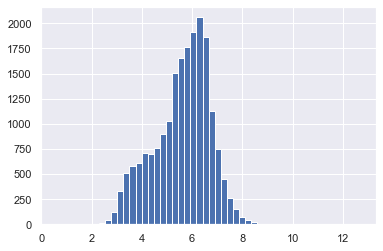

In [30]:
gold_recovery_full['rougher.output.tail_ag'].hist(bins = (50))

Заполним пропуски в столбце "rougher.output.tail_ag"

Выделим строки с пропусками в столбце 'rougher.output.tail_ag'

In [31]:
gold_recovery_full_nan = gold_recovery_full[gold_recovery_full['rougher.output.tail_ag'].isnull()]
gold_recovery_full_nan.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
99,2016-01-19 03:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.116168,NaN,7.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1549.052155,-500.274820,1548.147964,-500.140456,1551.246558,-500.102150,1549.613537,-500.344154,652.624634,-1607.685064,-276.558327,NaN,0.0,0.0,0.342757,30.525966,0.0,0.0,NaN,0.005591,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1000.044075,-499.701093,1601.264122,-500.208509,1602.147192,-501.166016,1403.699349,-500.472778,1200.039757,-500.722503,1100.262371,-501.588772,0.0,0.0,0.0,0.0,25.023285,-498.788519,22.947632,-499.973364,24.008926,-499.771421,23.021715,-500.241633,13.985160,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756
100,2016-01-19 04:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,7.25,0.003844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1549.558400,-500.299753,1548.453530,-499.997415,1550.885468,-499.430257,1548.365520,-499.846258,-1113.249700,-5862.022260,738.069870,NaN,0.0,0.0,0.334574,30.522523,0.0,0.0,NaN,0.001380,0.000254,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,999.863380,-500.412610,1598

Удалим целевые признаки для исключения утечки целевого признака, удалим признак date, поскольку он не несет важной для обучения информации и удалим rougher.output.tail_ag, поскольку его мы будем предсказывать

In [32]:
gold_recovery_full_nan = gold_recovery_full_nan.drop(['rougher.output.recovery', "final.output.recovery", 'rougher.output.tail_ag', "date"], axis=1)

Создадим обучающую и целевую выборки и в обучающей заполним пропуски методом "ffill", для возможности работы модели

In [33]:
# features = gold_recovery_full_nan.drop(('rougher.output.tail_ag'),  axis=1)
gold_recovery_full_nan = gold_recovery_full_nan.fillna(method = 'backfill')
gold_recovery_full_nan = gold_recovery_full_nan.fillna(method = 'ffill')

Предскажем пропущенные значения

In [34]:
predicted_features = model.predict(gold_recovery_full_nan)

Заполним пропуски предсказанными значениями

In [35]:
gold_recovery_full_nan['rougher.output.tail_ag'] = predicted_features

Объединим таблицу

In [36]:
gold_recovery_full['rougher.output.tail_ag'] = pd.concat([gold_recovery_full_nan['rougher.output.tail_ag']] + [gold_recovery_full_not_nan['rougher.output.tail_ag']])

Проверим

In [37]:
gold_recovery_full['rougher.output.tail_ag'].isnull().sum()

0

Все ок! Пропусков нет

Посмотрим на распределение признака после заполнение пропусков

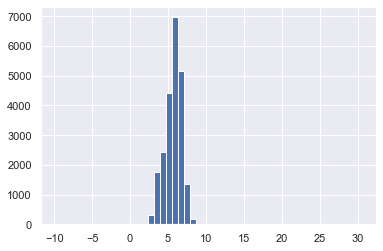

In [38]:
gold_recovery_full['rougher.output.tail_ag'].hist(bins = (50))

Видим, что все пропуски заполнены, характер распределения признаков аналогичен до и после заполнения.

Видим, что все пропуски заполнены, характер распределения признаков аналогичен до и после заполнения.

Теперь для автоматизации создадим функцию, которая пробежится по признакам с самыми большими пропусками (features_nan) и заполнит их на основе машинного обучения

In [39]:
def filling_blanks(collumn):
    gold_recovery_full[collumn].plot(kind = "hist", bins = 50, title = 'Характер распределения признака').legend ('До')
    gold_recovery_full_not_nan = gold_recovery_full[~gold_recovery_full[collumn].isnull()]
    gold_recovery_full_not_nan = gold_recovery_full_not_nan.drop(['rougher.output.recovery', "final.output.recovery", "date"], axis=1)
    target = gold_recovery_full_not_nan[collumn]
    features = gold_recovery_full_not_nan.drop((collumn),  axis=1)
    features = features.fillna(method = 'ffill')
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)

    print("Показатели для", "<", collumn, ">")
    print()
    print("Linear Regression")
    print(mean_absolute_error(target_valid, predicted_valid))
    print()
    predicted_valid = pd.Series(target_train.median(), index=target_valid.index)
    print("Median")
    print(mean_absolute_error(target_valid, predicted_valid))
    gold_recovery_full_2 = gold_recovery_full
    gold_recovery_full_2 = gold_recovery_full_2.drop([collumn], axis=1)
    gold_recovery_full_2 = gold_recovery_full_2.fillna(method = 'backfill')
    gold_recovery_full_2 = gold_recovery_full_2.fillna(method = 'ffill')
    gold_recovery_full_2 = gold_recovery_full_2.interpolate(method='slinear')
    gold_recovery_full_3 = gold_recovery_full_2.merge(gold_recovery_full[["date", collumn]], on=['date'], how='left')
    gold_recovery_full_nan = gold_recovery_full_3[gold_recovery_full_3[collumn].isnull()]
    gold_recovery_full_nan = gold_recovery_full_nan.drop(['rougher.output.recovery', "final.output.recovery", "date", collumn], axis=1)
    predicted_features = model.predict(gold_recovery_full_nan)
    gold_recovery_full_nan[collumn] = predicted_features
    gold_recovery_full[collumn] = pd.concat([gold_recovery_full_nan[collumn]] + [gold_recovery_full_not_nan[collumn]])
    print()
    print("Количество пропусков в", "<", collumn, ">" , " = ", gold_recovery_full[collumn].isnull().sum())
    gold_recovery_full[collumn].plot(kind = "hist", alpha = 0.5, bins = 50, title = 'Характер распределения признака до и после заполнения пропусков').legend ("После")
    plt.legend(loc="best")
    plt.show()
    print()
    print("________________________________________")
    print()

Уберем признк, в котором мы уже заполнитли пропуски

In [40]:
features_nan = features_nan.drop([0], axis=0)
list(features_nan)

['rougher.output.tail_sol',
 'rougher.output.tail_au',
 'rougher.input.floatbank11_xanthate',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'rougher.input.floatbank10_sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_sol']

Теперь применим нашу функцию к данному списку признаков, с самыми бльшими пропусками

Показатели для < rougher.output.tail_sol >

Linear Regression
1.1114723002560944

Median
2.6522674611391412

Количество пропусков в < rougher.output.tail_sol >  =  0


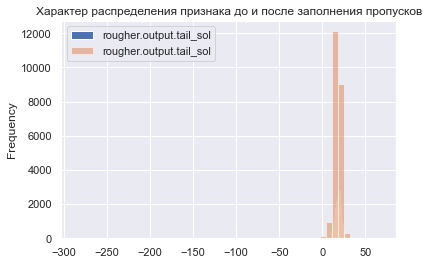


________________________________________

Показатели для < rougher.output.tail_au >

Linear Regression
0.13663902112356163

Median
0.524360974071104

Количество пропусков в < rougher.output.tail_au >  =  0


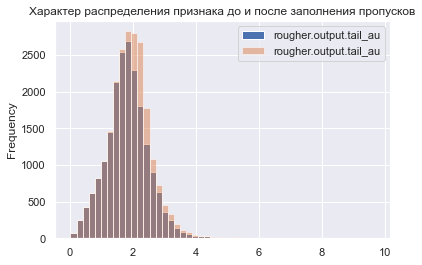


________________________________________

Показатели для < rougher.input.floatbank11_xanthate >

Linear Regression
0.1249818380414841

Median
0.9277216092756334

Количество пропусков в < rougher.input.floatbank11_xanthate >  =  0


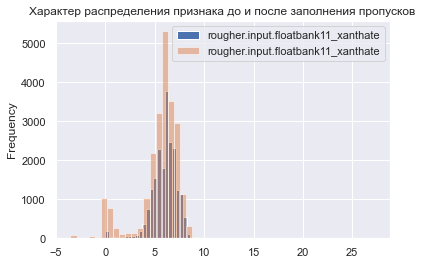


________________________________________

Показатели для < secondary_cleaner.output.tail_sol >

Linear Regression
1.172422347529034

Median
3.691351690811897

Количество пропусков в < secondary_cleaner.output.tail_sol >  =  0


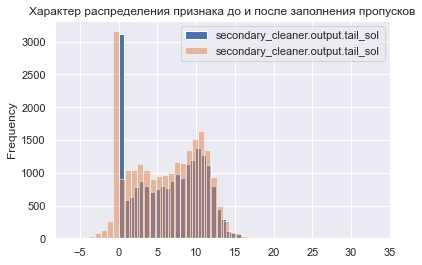


________________________________________

Показатели для < rougher.calculation.au_pb_ratio >

Linear Regression
0.20576426759189584

Median
0.4781109888082074

Количество пропусков в < rougher.calculation.au_pb_ratio >  =  0


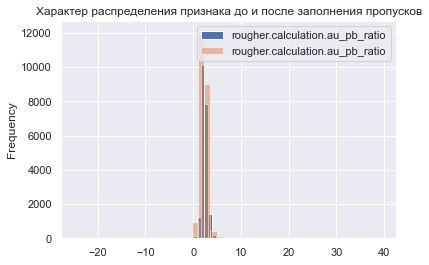


________________________________________

Показатели для < primary_cleaner.input.sulfate >

Linear Regression
14.404013425690907

Median
38.5274618070861

Количество пропусков в < primary_cleaner.input.sulfate >  =  0


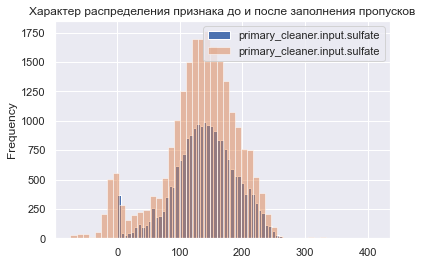


________________________________________

Показатели для < primary_cleaner.input.depressant >

Linear Regression
1.5658157362639982

Median
2.7924018520543266

Количество пропусков в < primary_cleaner.input.depressant >  =  0


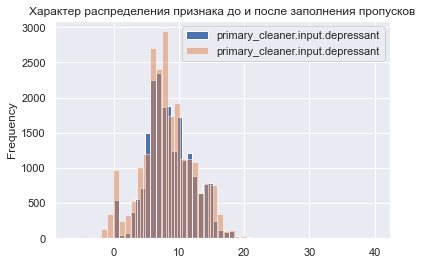


________________________________________

Показатели для < rougher.input.floatbank10_sulfate >

Linear Regression
0.2910666201811476

Median
3.034227134415351

Количество пропусков в < rougher.input.floatbank10_sulfate >  =  0


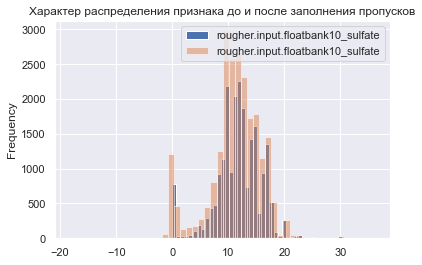


________________________________________

Показатели для < primary_cleaner.input.xanthate >

Linear Regression
0.24534447927519018

Median
0.3857131991824547

Количество пропусков в < primary_cleaner.input.xanthate >  =  0


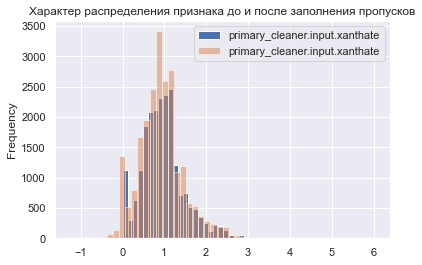


________________________________________

Показатели для < primary_cleaner.output.concentrate_sol >

Linear Regression
0.9984073227508948

Median
3.7626721784161803

Количество пропусков в < primary_cleaner.output.concentrate_sol >  =  0


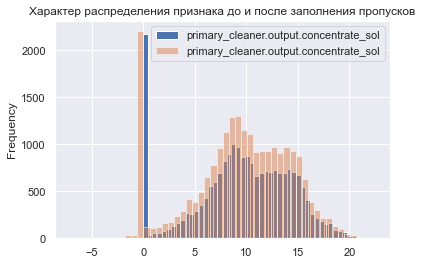


________________________________________



In [41]:
for features in list(features_nan):
    filling_blanks(features)
    

Вообщем видим, что все пропуски заполнены, характеры распределения признаков аналогичные до и после заполнения.

Удалим пропуски в оставшихся признаках, кроме целевых

In [42]:
gold_recovery_full_2 = gold_recovery_full.drop(['rougher.output.recovery', "final.output.recovery"], axis=1) 
gold_recovery_full_2 = gold_recovery_full_2.fillna(method = 'ffill')

Посмотрим, остались ли пропуски

In [43]:
gold_recovery_full_2.isnull().sum().sum()

0

Все ок! Пропусков нет!

Добавим целевые признаки и пойдем дальше

In [44]:
gold_recovery_full = gold_recovery_full_2.merge(gold_recovery_full[["date", 'rougher.output.recovery', "final.output.recovery"]], on=['date'], how='left')

# 2. Анализ данных

## 2.1. Анализ концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Существуют следующие этапы очистки:
* Исходное сырье
* Первичная очистка
* Вторичная очистка
* Финальный концентрат

Отфильтруем таблицу с концентрацией указанных металлов на разных этапах очистки

Составим список столбцов, содержащих в своем названии слово "concentrate" и 'input', и не содержащих слово "calculation" и "concentrate_sol"

In [45]:
col_concentrate = gold_recovery_full.columns[gold_recovery_full.columns.str.contains('concentrate') | gold_recovery_full.columns.str.contains('input')]
col_concentrate = col_concentrate[~ col_concentrate.str.contains('calculation')]
col_concentrate = col_concentrate[~ col_concentrate.str.contains("concentrate_sol")]
col_concentrate

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_au', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_au'],
      dtype='object')

Составим список столбцов, содержащих в своем названии названия металлов

In [46]:
col_concentrate_au = col_concentrate[col_concentrate.str.contains('au')]
col_concentrate_ag = col_concentrate[col_concentrate.str.contains('ag')]
col_concentrate_pb = col_concentrate[col_concentrate.str.contains('pb')]

Проверим аномалии распределения по этим столбцам

In [47]:
gold_recovery_full[col_concentrate_au].describe()

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.input.feed_au,rougher.output.concentrate_au
count,22716.000000,22716.000000,22716.000000,22716.000000
mean,39.891718,29.119967,7.545861,17.831509
std,13.540157,10.650273,3.047761,6.842737
min,0.000000,0.000000,0.000000,0.000000
25%,42.353890,29.336078,6.473371,17.894015
50%,44.639019,32.345542,7.879193,19.995513
75%,46.106662,34.762169,9.664583,21.562366
max,53.611374,45.933934,14.093363,28.824507


In [48]:
gold_recovery_full[col_concentrate_ag].describe()

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.input.feed_ag,rougher.output.concentrate_ag
count,22716.000000,22716.000000,22716.000000,22716.000000
mean,4.768013,7.666972,8.044237,10.845609
std,2.042594,3.134033,3.148133,4.406924
min,0.000000,0.000000,0.000000,0.000000
25%,4.011471,6.756639,6.935723,10.112351
50%,4.949959,8.256062,8.295898,11.774115
75%,5.857985,9.690952,10.127434,13.609712
max,16.001945,16.081632,14.869652,24.480271


In [49]:
gold_recovery_full[col_concentrate_pb].describe()

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.input.feed_pb,rougher.output.concentrate_pb
count,22716.000000,22716.000000,22716.000000,22716.000000
mean,9.071366,8.809217,3.282945,6.886869
std,3.260960,3.798169,1.462554,2.831347
min,0.000000,0.000000,0.000000,0.000000
25%,8.737809,7.649745,2.634169,6.366740
50%,9.910363,9.882876,3.419915,7.570890
75%,10.927188,11.234420,4.199225,8.477617
max,17.031899,17.081278,7.142594,18.394042


На первый взляд аномалий аномалий нет. Позже исследуем этот вопрос более подробно.

Создадим таблицы со средними значениями по этим столбцам

In [50]:
gold_recovery_full_concentrate_au = pd.DataFrame(gold_recovery_full[col_concentrate_au].mean(), columns = ['concentrate_au']).reset_index()
gold_recovery_full_concentrate_ag = pd.DataFrame(gold_recovery_full[col_concentrate_ag].mean(), columns = ['concentrate_ag']).reset_index()
gold_recovery_full_concentrate_pb = pd.DataFrame(gold_recovery_full[col_concentrate_pb].mean(), columns = ['concentrate_pb']).reset_index()

Заменим названия колонки

In [51]:
gold_recovery_full_concentrate_au.rename(columns={'index': 'stage'}, inplace=True)
gold_recovery_full_concentrate_ag.rename(columns={'index': 'stage'}, inplace=True)
gold_recovery_full_concentrate_pb.rename(columns={'index': 'stage'}, inplace=True)

Заменим названия колонки "stage" на названия стадий очистки

In [52]:
stage = ['Финальный концентрат',
         'Вторичная очистка',
         'Исходное сырье', "Первичная очистка"]

gold_recovery_full_concentrate_au["stage"] = stage
gold_recovery_full_concentrate_ag["stage"] = stage
gold_recovery_full_concentrate_pb["stage"] = stage

Объединим таблица металлов

In [53]:
gold_recovery_full_concentrate = gold_recovery_full_concentrate_au.merge(gold_recovery_full_concentrate_ag[["stage", "concentrate_ag"]], on=['stage'], how='left')
gold_recovery_full_concentrate = gold_recovery_full_concentrate.merge(gold_recovery_full_concentrate_pb[["stage", "concentrate_pb"]], on=['stage'], how='left')
gold_recovery_full_concentrate

,stage,concentrate_au,concentrate_ag,concentrate_pb
0,Финальный концентрат,39.891718,4.768013,9.071366
1,Вторичная очистка,29.119967,7.666972,8.809217
2,Исходное сырье,7.545861,8.044237,3.282945
3,Первичная очистка,17.831509,10.845609,6.886869


Поменяем названия индексов для дальнейшей сортировки

In [54]:
gold_recovery_full_concentrate = gold_recovery_full_concentrate.rename(index={0: "0", 1: "1", 2: "3", 3: "2"})
gold_recovery_full_concentrate = gold_recovery_full_concentrate.sort_index()

In [55]:
gold_recovery_full_concentrate

,stage,concentrate_au,concentrate_ag,concentrate_pb
0,Финальный концентрат,39.891718,4.768013,9.071366
1,Вторичная очистка,29.119967,7.666972,8.809217
2,Первичная очистка,17.831509,10.845609,6.886869
3,Исходное сырье,7.545861,8.044237,3.282945


Поменяем последовательность строк согласно хронологии процессов и поменяем индексы

In [56]:
gold_recovery_full_concentrate = gold_recovery_full_concentrate.iloc[::-1].reset_index(drop=True)
gold_recovery_full_concentrate.index = gold_recovery_full_concentrate["stage"]
gold_recovery_full_concentrate = gold_recovery_full_concentrate.drop(['stage'], axis = 1)
gold_recovery_full_concentrate
gold_recovery_full_concentrate.rename(index={0: "x", 1: "y", 2: "z"})

,concentrate_au,concentrate_ag,concentrate_pb
stage,,,
Исходное сырье,7.545861,8.044237,3.282945
Первичная очистка,17.831509,10.845609,6.886869
Вторичная очистка,29.119967,7.666972,8.809217
Финальный концентрат,39.891718,4.768013,9.071366


Нарисуем диаграмму "Концентрация металлов (Au, Ag, Pb) на различных этапах очистки"

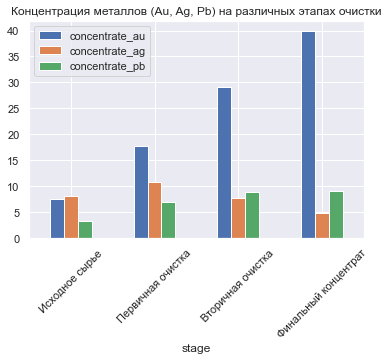

In [57]:
gold_recovery_full_concentrate.plot(kind = "bar", rot = 45, title= 'Концентрация металлов (Au, Ag, Pb) на различных этапах очистки')
plt.show()

Выводы:
* Концентрации металлов на этапах очистки меняются неодинаково
* Концентрация золота и свинца увеличивается постоянно от этапа к этапу
* концентрация серебра увеличивается нв втором этапе, но дальше на 3 и 4 этапе снижается
* Сильнее всех на этапах очистки изменяется (повышается) концентрация золота

## 2.2. Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

Размер гранул сырья отражен в строках:
* "rougher.input.feed_size" - размер гранул в исходном сырье
* "primary_cleaner.input.feed_size" - размер гранул после первичной очистки


Отфильтруем таблицу с этими призаками

Составим список столбцов, содержащих в своем названии слово "size" в обучающей и тестовой выборках 

In [58]:
col_size_train = gold_recovery_train.columns[gold_recovery_train.columns.str.contains('size')]
col_size_test = gold_recovery_test.columns[gold_recovery_test.columns.str.contains('size')]

In [59]:
col_size_train

Index(['primary_cleaner.input.feed_size', 'rougher.input.feed_size'], dtype='object')

Создадим таблицы с данными столбцами

In [60]:
gold_recovery_train_size = pd.DataFrame(gold_recovery_train[col_size_train])
gold_recovery_test_size = pd.DataFrame(gold_recovery_test[col_size_test])
gold_recovery_train_size.head()

,primary_cleaner.input.feed_size,rougher.input.feed_size
0,7.25,55.486599
1,7.25,57.278666
2,7.25,57.510649
3,7.25,57.792734
4,7.25,56.047189


Заменим названия колонок и поменяем их местами

In [61]:
gold_recovery_train_size.rename(columns={'primary_cleaner.input.feed_size': 'Размер гранул после первичной очистки - train', 'rougher.input.feed_size': 'Размер гранул в исходном сырье - train'}, inplace=True)
gold_recovery_test_size.rename(columns={'primary_cleaner.input.feed_size': 'Размер гранул после первичной очистки - test', 'rougher.input.feed_size': 'Размер гранул в исходном сырье - test'}, inplace=True)
cols_train = gold_recovery_train_size.columns.tolist()
cols_test = gold_recovery_test_size.columns.tolist()
cols_train = cols_train[-1:] + cols_train[:-1]
cols_test = cols_test[-1:] + cols_test[:-1]
gold_recovery_train_size = gold_recovery_train_size[cols_train]
gold_recovery_test_size = gold_recovery_test_size[cols_test]
gold_recovery_test_size.head()

,Размер гранул в исходном сырье - test,Размер гранул после первичной очистки - test
0,62.710452,8.080000
1,61.961163,8.080000
2,66.903807,7.786667
3,59.865919,7.640000
4,63.315324,7.530000


Посмотрим на характер распеределения размеров гранул сырья на обучающей и тестовой выборках

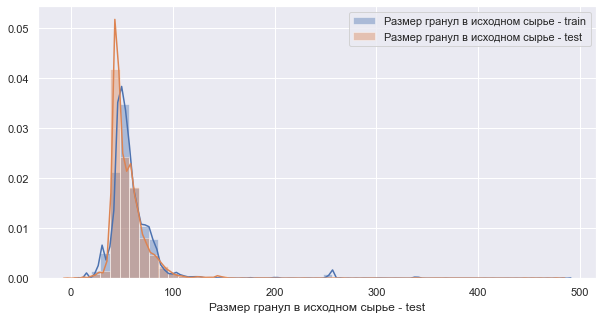

In [62]:
sns.set()
plt.rcParams['figure.figsize'] = 10,5
sns.distplot(gold_recovery_train_size['Размер гранул в исходном сырье - train'].fillna(method = 'ffill'), norm_hist=1, kde=1, label="Размер гранул в исходном сырье - train")
sns.distplot(gold_recovery_test_size['Размер гранул в исходном сырье - test'].fillna(method = 'ffill'), norm_hist=1, kde=1, label="Размер гранул в исходном сырье - test")
plt.legend()
plt.show()

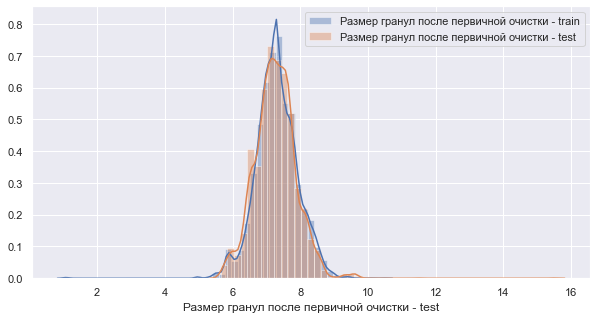

In [63]:
sns.set()
plt.rcParams['figure.figsize'] = 10,5
sns.distplot(gold_recovery_train_size['Размер гранул после первичной очистки - train'].fillna(method = 'ffill'), norm_hist=1, kde=1, label="Размер гранул после первичной очистки - train")
sns.distplot(gold_recovery_test_size['Размер гранул после первичной очистки - test'].fillna(method = 'ffill'), norm_hist=1, kde=1, label="Размер гранул после первичной очистки - test")
plt.legend()
plt.show()

Видим, что распределение однотипное, но есть выбросы. Посмотрим на характер выбросов в обучающей и тестовой выборках с помощью диаграммы "Ящик с усами"

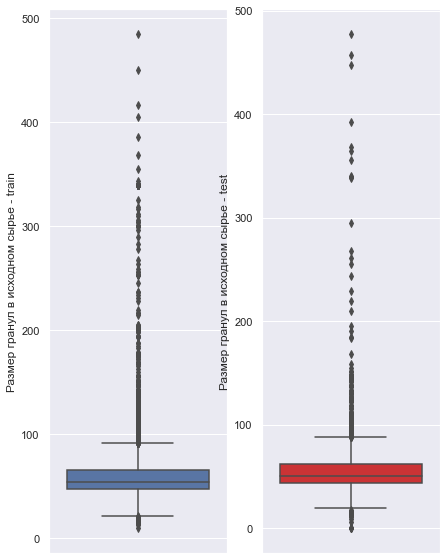

In [64]:
sns.set()
plt.rcParams['figure.figsize'] = 7,10
ax1 = plt.subplot2grid(shape=(1,2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1,2), loc=(0, 1))
sns.boxplot(y='Размер гранул в исходном сырье - train', data = gold_recovery_train_size, ax=ax1)
sns.boxplot(y='Размер гранул в исходном сырье - test', data = gold_recovery_test_size, palette="Set1", ax=ax2)
plt.show()

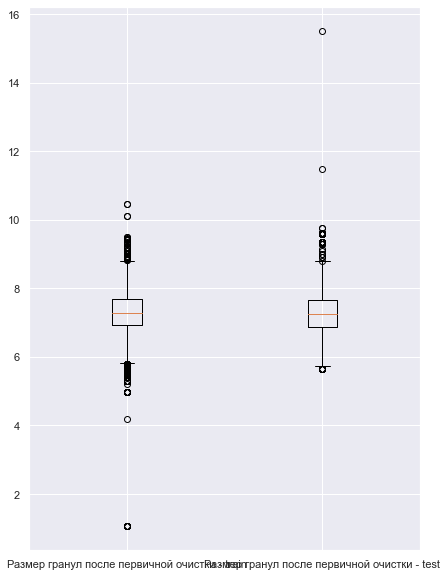

In [65]:
sns.set()
plt.boxplot((gold_recovery_train_size['Размер гранул после первичной очистки - train'], gold_recovery_test_size['Размер гранул после первичной очистки - test']), notch=False,  sym="o", labels=["Размер гранул после первичной очистки - train", "Размер гранул после первичной очистки - test"])
plt.show()

Видим, что основная масса выбросов однотипные в обучающей и тестовой выборках. Ну и чтобы окончатльно убдеиться в этом посмотрим на количественные показатели распределения

In [66]:
pd.DataFrame(gold_recovery_test_size.describe())

,Размер гранул в исходном сырье - test,Размер гранул после первичной очистки - test
count,5834.000000,5856.000000
mean,55.937535,7.264651
std,22.724254,0.611526
min,0.046369,5.650000
25%,43.890852,6.885625
50%,50.002004,7.259333
75%,61.638434,7.650000
max,477.445473,15.500000


In [67]:
describe = pd.DataFrame(gold_recovery_train_size.describe()).join(pd.DataFrame(gold_recovery_test_size.describe()))
describe

,Размер гранул в исходном сырье - train,Размер гранул после первичной очистки - train,Размер гранул в исходном сырье - test,Размер гранул после первичной очистки - test
count,16443.000000,16860.000000,5834.000000,5856.000000
mean,58.676444,7.297285,55.937535,7.264651
std,23.922591,0.619166,22.724254,0.611526
min,9.659576,1.080000,0.046369,5.650000
25%,47.575879,6.940000,43.890852,6.885625
50%,54.104257,7.285000,50.002004,7.259333
75%,65.051064,7.700000,61.638434,7.650000
max,484.967466,10.470000,477.445473,15.500000


Уберем количство элементов в выборках, поскольку оно различно и не имеет отношение к распределению.

Уберем количство элементов выборок, поскольку оно различно и не имеет отношение к распределению.

In [68]:
describe = describe.drop(['count'], axis=0)

Построим график, показывающий параметры размеров гранул в обучающей и тестовой выборках

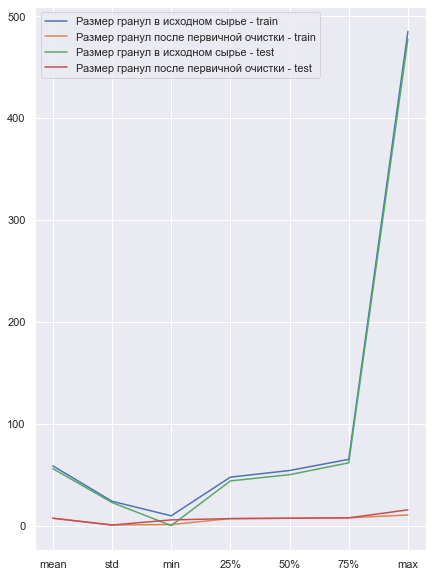

In [69]:
describe.plot()
plt.show()

#####  Вывод: Этот график, в совокупности с предыдущими, убедительно доказывает, что распределения размеров гранул сырья на обучающей и тестовой выборках очень схожи. Следователно, оценка моделей будет правильной

## 2.3. Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Задание включает в себя несколько задач:
* Исследование суммарного распределения концентраций всех веществ на разных стадиях с поиском аномалий и формулировкой выводов
* Удаление аномалий

Кроме уже известных металов мы должны учесть еще одно вещество, которове имеет название "sol". Вероятно это соли, в том числе этих металлов. От английского Sol - соль.

### 2.3.1. Исследование суммарного распределения концентраций всех веществ на разных стадиях с поиском аномалий и формулировкой выводов

Похожую задачу мы решали в задани 2.1. Но там мы смотели концентрацию только металлов и по отдельности. Сейчас посмотрим суммарную концентрацию веществ, включая sol. 

Составим список столбцов, содержащих в своем названии слово "concentrate" и 'input', и не содержащих слово "calculation"

In [70]:
col_concentrate = gold_recovery_full.columns[gold_recovery_full.columns.str.contains('concentrate') | gold_recovery_full.columns.str.contains('input')]
col_concentrate = col_concentrate[~ col_concentrate.str.contains('calculation')]

Составим список столбцов, содержащих в своем названии названия всех веществ

In [71]:
col_concentrate_au = col_concentrate[col_concentrate.str.contains('au')]
col_concentrate_ag = col_concentrate[col_concentrate.str.contains('ag')]
col_concentrate_pb = col_concentrate[col_concentrate.str.contains('pb')]
col_concentrate_sol = col_concentrate[col_concentrate.str.contains('sol')]

In [72]:
col_concentrate_au

Index(['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
       'rougher.input.feed_au', 'rougher.output.concentrate_au'],
      dtype='object')

Создадим таблицу с концентрацией всех веществ на разных стадиях

Для этого создадим таблицы со значениями по этим столбцам

In [73]:
gold_recovery_full_concentrate_au = gold_recovery_full[col_concentrate_au]
gold_recovery_full_concentrate_ag = gold_recovery_full[col_concentrate_ag]
gold_recovery_full_concentrate_pb = gold_recovery_full[col_concentrate_pb]
gold_recovery_full_concentrate_sol = gold_recovery_full[col_concentrate_sol]

Заменим названия колонок

In [74]:
gold_recovery_full_concentrate_au.rename(columns={'final.output.concentrate_au': 'Финальный концентрат au',
                                                  'primary_cleaner.output.concentrate_au': 'Вторичная очистка au',
                                                  'rougher.input.feed_au': 'Исходное сырье au',
                                                  'rougher.output.concentrate_au': 'Первичная очистка au'}, inplace=True)
gold_recovery_full_concentrate_ag.rename(columns={'final.output.concentrate_ag': 'Финальный концентрат ag',
                                                  'primary_cleaner.output.concentrate_ag': 'Вторичная очистка ag',
                                                  'rougher.input.feed_ag': 'Исходное сырье ag',
                                                  'rougher.output.concentrate_ag': 'Первичная очистка ag'}, inplace=True)
gold_recovery_full_concentrate_pb.rename(columns={'final.output.concentrate_pb': 'Финальный концентрат pb',
                                                  'primary_cleaner.output.concentrate_pb': 'Вторичная очистка pb',
                                                  'rougher.input.feed_pb': 'Исходное сырье pb',
                                                  'rougher.output.concentrate_pb': 'Первичная очистка pb'}, inplace=True)
gold_recovery_full_concentrate_sol.rename(columns={'final.output.concentrate_sol': 'Финальный концентрат sol',
                                                  'primary_cleaner.output.concentrate_sol': 'Вторичная очистка sol',
                                                  'rougher.input.feed_sol': 'Исходное сырье sol',
                                                  'rougher.output.concentrate_sol': 'Первичная очистка sol'}, inplace=True)

Посчитем суммарную концентрацию всех веществ по стадиям

In [75]:
gold_recovery_full_concentrat = pd.DataFrame([])

In [76]:
gold_recovery_full_concentrat["Исходное сырье - сумм"] = gold_recovery_full_concentrate_au ['Исходное сырье au'] + gold_recovery_full_concentrate_ag ['Исходное сырье ag'] + gold_recovery_full_concentrate_pb ['Исходное сырье pb'] + gold_recovery_full_concentrate_sol ['Исходное сырье sol']

In [77]:
gold_recovery_full_concentrat["Первичная очистка - сумм"] = gold_recovery_full_concentrate_au ['Первичная очистка au'] + gold_recovery_full_concentrate_ag ['Первичная очистка ag'] + gold_recovery_full_concentrate_pb ['Первичная очистка pb'] + gold_recovery_full_concentrate_sol ['Первичная очистка sol']

In [78]:
gold_recovery_full_concentrat["Вторичная очистка - сумм"] = gold_recovery_full_concentrate_au ['Вторичная очистка au'] + gold_recovery_full_concentrate_ag ['Вторичная очистка ag'] + gold_recovery_full_concentrate_pb ['Вторичная очистка pb'] + gold_recovery_full_concentrate_sol ['Вторичная очистка sol']

In [79]:
gold_recovery_full_concentrat["Финальный концентрат - сумм"] = gold_recovery_full_concentrate_au ['Финальный концентрат au'] + gold_recovery_full_concentrate_ag ['Финальный концентрат ag'] + gold_recovery_full_concentrate_pb ['Финальный концентрат pb'] + gold_recovery_full_concentrate_sol ['Финальный концентрат sol']

In [80]:
gold_recovery_full_concentrat.index = gold_recovery_full["date"]

In [81]:
gold_recovery_full_concentrat

,Исходное сырье - сумм,Первичная очистка - сумм,Вторичная очистка - сумм,Финальный концентрат - сумм
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
2018-08-18 06:59:59,53.415050,70.781325,59.001692,68.098589
2018-08-18 07:59:59,53.696482,70.539603,59.703912,68.274362
2018-08-18 08:59:59,54.589604,55.376330,59.561096,68.226068


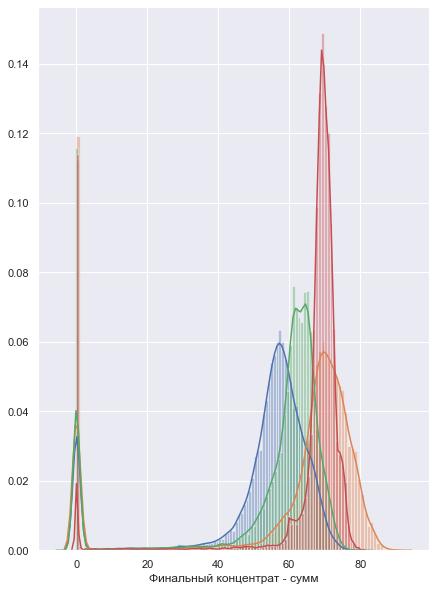

In [82]:

sns.distplot(gold_recovery_full_concentrat['Исходное сырье - сумм'], bins = (100), norm_hist=1, kde=1)
sns.distplot(gold_recovery_full_concentrat['Первичная очистка - сумм'],  bins = (100), norm_hist=1, kde=1)
sns.distplot(gold_recovery_full_concentrat['Вторичная очистка - сумм'],  bins = (100), norm_hist=1, kde=1)
sns.distplot(gold_recovery_full_concentrat['Финальный концентрат - сумм'],  bins = (100), norm_hist=1, kde=1)
plt.show()

Смущает наличие нулевых концентраций. Распределение  близко к нормальному, но нулевые значения портят всю картину. Посмотрим распределение концентрации каждого вещества по отдельности.

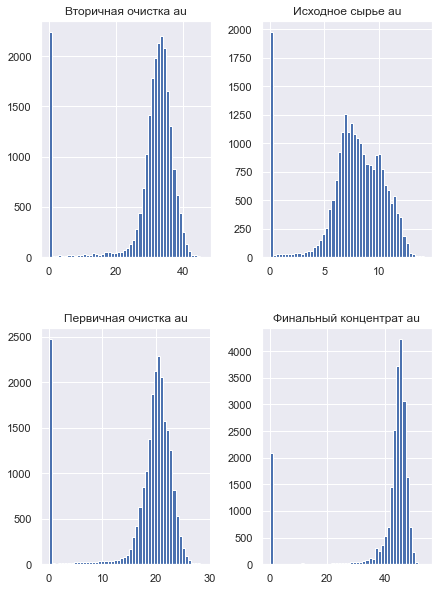

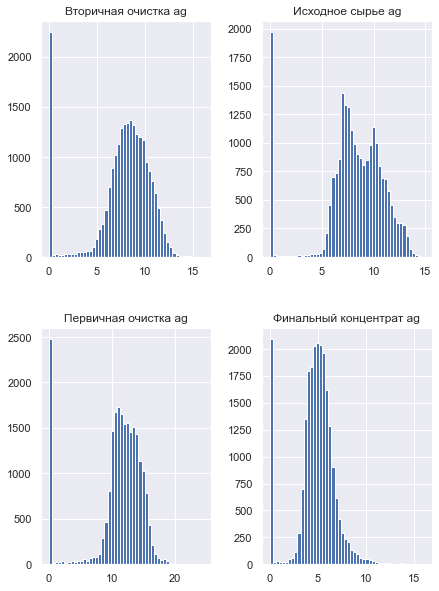

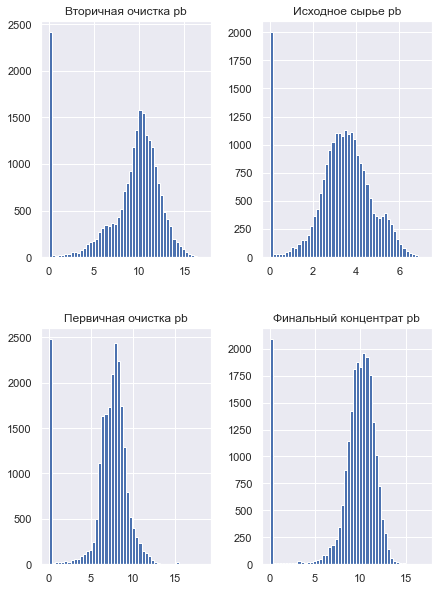

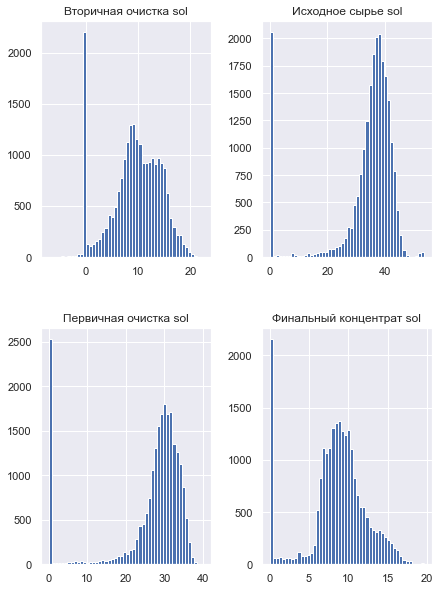

In [83]:
data = (gold_recovery_full_concentrate_au, gold_recovery_full_concentrate_ag, gold_recovery_full_concentrate_pb, gold_recovery_full_concentrate_sol)
for data in data:
    data.hist(bins = (50))
    plt.show()

Видим, примерно одинаковую картину в концентрациях всех веществ. проверим гипотезу, что нулевые значения могут появляться аномальным путем. Если в пробе на более ранней стадии нет вещества, то оно не может быть и в более поздней пробе. И если оно там появляется в обычной для этой стадии концентрации, то это - аномалия и следовательно это возможно. Проверим бывает ли такое. 

In [84]:
gold_recovery_full_concentrate_au[(gold_recovery_full_concentrate_au['Исходное сырье au'] == 0) & (gold_recovery_full_concentrate_au['Финальный концентрат au'] > 0)]


,Финальный концентрат au,Вторичная очистка au,Исходное сырье au,Первичная очистка au
1149,40.692948,35.789403,0.0,15.907362
1150,40.017793,30.648208,0.0,15.018306
1925,23.065777,21.679935,0.0,0.000000
2205,24.466099,0.000000,0.0,0.000000
2415,34.655312,32.609425,0.0,1.517623
...,...,...,...,...
17781,1.557696,0.000000,0.0,0.000000
17820,46.497148,38.921909,0.0,19.026627
17821,44.276995,31.361025,0.0,16.035962
17822,22.633834,31.394833,0.0,13.147147


Мы видим, что в исходном сырье зотота нет, но оно появляется в более поздних стадиях в обычных концентрациях. Даже видим, что в строке 2205 золота нет во всех трех предыдущих этапах, но оно появляется в финальном концентрате. Следовательно это наблюдение показывает возможность аномальных нулей. Для корректного обучения и работы модели нужно убрать строки с нулевыми значениями концентраций веществ в тренировочной и тестовой выборках.

Посморим на распределения суманых концентраций с помощью диаграммы "Ящик с усами".

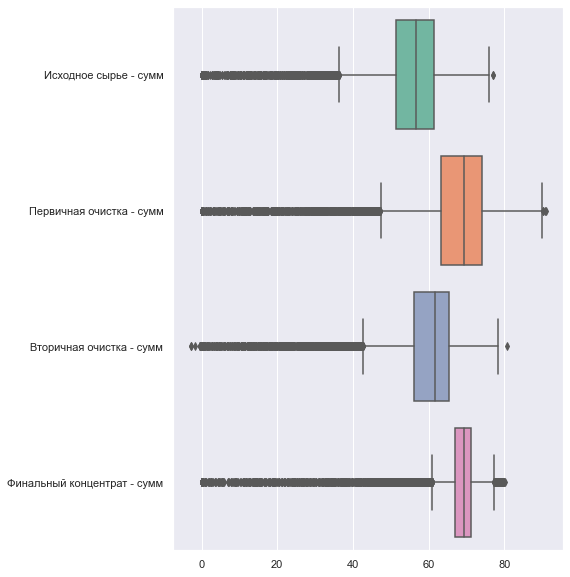

In [85]:
sns.boxplot(data=gold_recovery_full_concentrat, orient="h", palette="Set2")
plt.show()

Видим длинные хвосты слева. Но а если посмотреть каждое вещество отдельно.

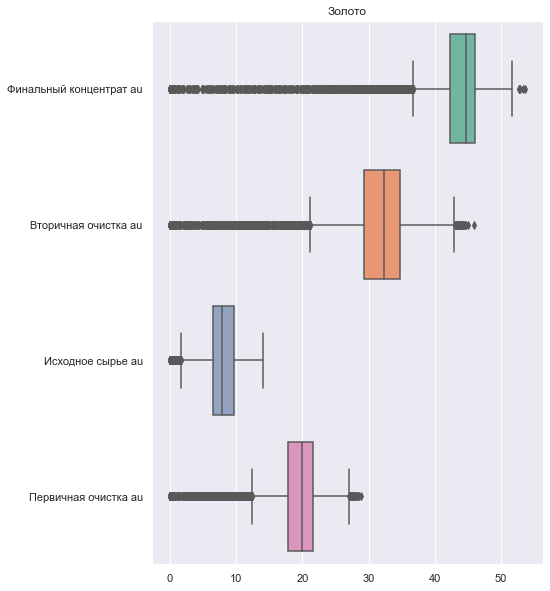

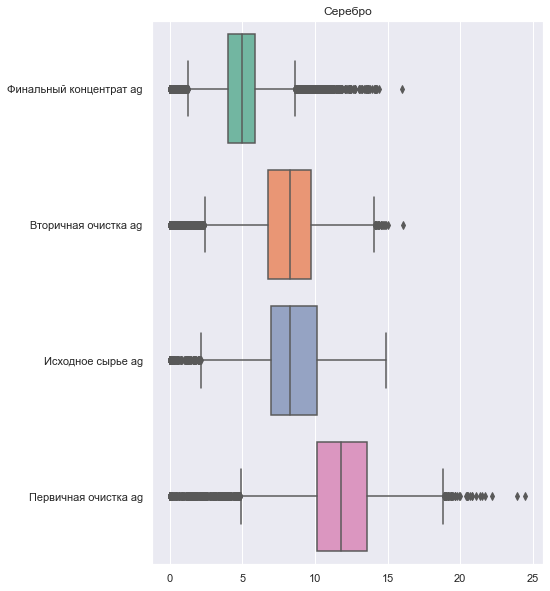

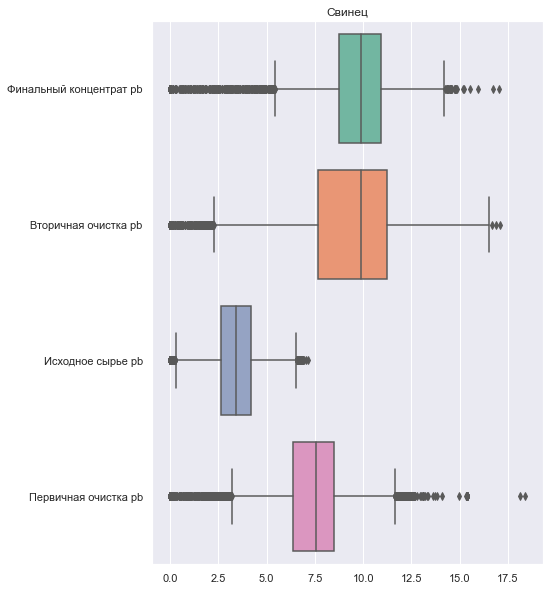

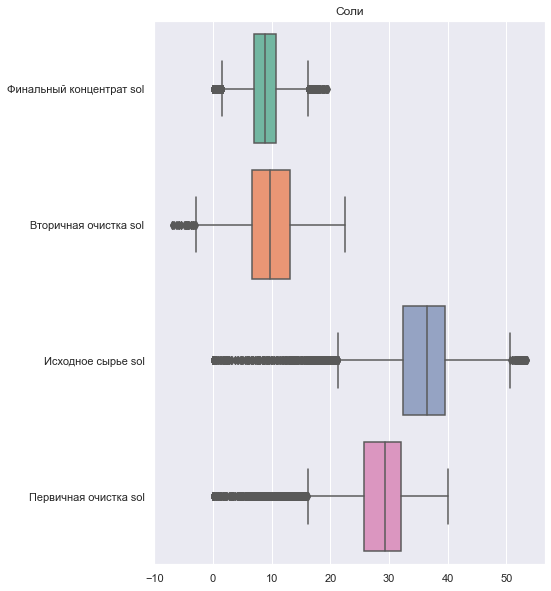

In [86]:
data = (gold_recovery_full_concentrate_au, gold_recovery_full_concentrate_ag, gold_recovery_full_concentrate_pb, gold_recovery_full_concentrate_sol)
substance = ("Золото", "Серебро", "Свинец", "Соли")
for data, substance in zip(data, substance):
    sns.boxplot(data=data, orient="h", palette="Set2")
    plt.title(substance, size=12)
    plt.show()

Действительно видим, что хвосты во всех случаях тянуться до нуля. Концентрация величина непрерывная и она может сябя так вести. поэтому для того, чтобы сильно не искажать выборки и делать предсказания для проб с маленькими концентрациями можно просто убрать нули и отрицательные концентрации солей на этапе вторичной очистки в тренировочной и тестовой выборках.

### 2.3.2. Удаление аномалий - сумарных концентраций менее 35

Название колонок у нас уже есть, поэтому просто пробежимся по ним вложенным циклом для тренировочного и тестового датасета по-отдельности

In [87]:
gold_recovery_full_concentrat

,Исходное сырье - сумм,Первичная очистка - сумм,Вторичная очистка - сумм,Финальный концентрат - сумм
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
2018-08-18 06:59:59,53.415050,70.781325,59.001692,68.098589
2018-08-18 07:59:59,53.696482,70.539603,59.703912,68.274362
2018-08-18 08:59:59,54.589604,55.376330,59.561096,68.226068


In [88]:
gold_recovery_full_concentrat[gold_recovery_full_concentrat["Финальный концентрат - сумм"] < 35 ]["Финальный концентрат - сумм"].count()

2327

In [89]:
gold_recovery_full_concentrat

,Исходное сырье - сумм,Первичная очистка - сумм,Вторичная очистка - сумм,Финальный концентрат - сумм
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
2018-08-18 06:59:59,53.415050,70.781325,59.001692,68.098589
2018-08-18 07:59:59,53.696482,70.539603,59.703912,68.274362
2018-08-18 08:59:59,54.589604,55.376330,59.561096,68.226068


In [90]:
 gold_recovery_full_concentrat[(gold_recovery_full_concentrat["Финальный концентрат - сумм"] > 35)]

,Исходное сырье - сумм,Первичная очистка - сумм,Вторичная очистка - сумм,Финальный концентрат - сумм
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
2018-08-18 06:59:59,53.415050,70.781325,59.001692,68.098589
2018-08-18 07:59:59,53.696482,70.539603,59.703912,68.274362
2018-08-18 08:59:59,54.589604,55.376330,59.561096,68.226068


In [91]:
gold_recovery_full_concentrat_2 = gold_recovery_full_concentrat[gold_recovery_full_concentrat["Финальный концентрат - сумм"] > 35]

In [92]:
gold_recovery_full_concentrat_2.index

DatetimeIndex(['2016-01-15 00:00:00', '2016-01-15 01:00:00',
               '2016-01-15 02:00:00', '2016-01-15 03:00:00',
               '2016-01-15 04:00:00', '2016-01-15 05:00:00',
               '2016-01-15 06:00:00', '2016-01-15 07:00:00',
               '2016-01-15 08:00:00', '2016-01-15 09:00:00',
               ...
               '2018-08-18 01:59:59', '2018-08-18 02:59:59',
               '2018-08-18 03:59:59', '2018-08-18 04:59:59',
               '2018-08-18 05:59:59', '2018-08-18 06:59:59',
               '2018-08-18 07:59:59', '2018-08-18 08:59:59',
               '2018-08-18 09:59:59', '2018-08-18 10:59:59'],
              dtype='datetime64[ns]', name='date', length=20389, freq=None)

In [93]:
set(gold_recovery_full_concentrat_2.index)

{Timestamp('2016-10-04 13:59:59'),
 Timestamp('2016-11-18 18:59:59'),
 Timestamp('2016-03-22 16:00:00'),
 Timestamp('2016-12-10 05:59:59'),
 Timestamp('2016-04-11 10:00:00'),
 Timestamp('2016-10-30 21:59:59'),
 Timestamp('2016-01-23 01:00:00'),
 Timestamp('2018-04-10 22:59:59'),
 Timestamp('2017-10-20 10:59:59'),
 Timestamp('2016-02-02 08:00:00'),
 Timestamp('2018-06-28 11:59:59'),
 Timestamp('2017-06-13 14:59:59'),
 Timestamp('2017-05-23 22:59:59'),
 Timestamp('2016-06-10 11:59:59'),
 Timestamp('2016-03-17 17:00:00'),
 Timestamp('2018-03-24 18:59:59'),
 Timestamp('2016-03-14 11:00:00'),
 Timestamp('2016-03-14 13:00:00'),
 Timestamp('2018-01-14 11:59:59'),
 Timestamp('2017-03-14 11:59:59'),
 Timestamp('2017-01-19 11:59:59'),
 Timestamp('2018-06-12 10:59:59'),
 Timestamp('2017-03-22 01:59:59'),
 Timestamp('2016-08-19 15:59:59'),
 Timestamp('2016-11-14 08:59:59'),
 Timestamp('2016-02-02 16:00:00'),
 Timestamp('2017-01-05 12:59:59'),
 Timestamp('2017-10-29 19:59:59'),
 Timestamp('2017-09-

In [94]:
index_train = list(set(gold_recovery_full_concentrat_2.index) & set(gold_recovery_train.date))
index_test = list(set(gold_recovery_full_concentrat_2.index) & set(gold_recovery_test.date))
pd.Series(index_test).count()

5432

In [95]:
index_test

[Timestamp('2016-12-12 01:59:59'),
 Timestamp('2016-10-04 13:59:59'),
 Timestamp('2016-11-18 18:59:59'),
 Timestamp('2016-09-03 04:59:59'),
 Timestamp('2017-09-06 20:59:59'),
 Timestamp('2016-12-10 05:59:59'),
 Timestamp('2017-09-28 17:59:59'),
 Timestamp('2017-12-20 01:59:59'),
 Timestamp('2017-12-15 02:59:59'),
 Timestamp('2016-10-30 21:59:59'),
 Timestamp('2017-10-20 10:59:59'),
 Timestamp('2017-11-09 00:59:59'),
 Timestamp('2016-09-22 03:59:59'),
 Timestamp('2017-12-06 20:59:59'),
 Timestamp('2017-12-23 03:59:59'),
 Timestamp('2016-12-25 21:59:59'),
 Timestamp('2017-10-10 12:59:59'),
 Timestamp('2017-11-16 05:59:59'),
 Timestamp('2017-12-13 16:59:59'),
 Timestamp('2017-12-11 17:59:59'),
 Timestamp('2017-09-24 23:59:59'),
 Timestamp('2017-09-06 23:59:59'),
 Timestamp('2016-11-01 08:59:59'),
 Timestamp('2016-11-16 18:59:59'),
 Timestamp('2017-11-16 08:59:59'),
 Timestamp('2017-12-19 03:59:59'),
 Timestamp('2016-11-14 08:59:59'),
 Timestamp('2017-10-29 19:59:59'),
 Timestamp('2017-09-

In [96]:
index_train

[Timestamp('2018-04-09 00:59:59'),
 Timestamp('2016-06-04 20:59:59'),
 Timestamp('2016-03-22 16:00:00'),
 Timestamp('2016-07-17 00:59:59'),
 Timestamp('2016-03-26 07:00:00'),
 Timestamp('2017-04-03 09:59:59'),
 Timestamp('2016-02-05 23:00:00'),
 Timestamp('2018-08-11 21:59:59'),
 Timestamp('2016-04-11 10:00:00'),
 Timestamp('2016-04-30 05:59:59'),
 Timestamp('2017-01-25 15:59:59'),
 Timestamp('2016-02-28 11:00:00'),
 Timestamp('2016-04-27 02:59:59'),
 Timestamp('2017-07-14 06:59:59'),
 Timestamp('2016-01-23 01:00:00'),
 Timestamp('2018-01-17 10:59:59'),
 Timestamp('2016-01-16 00:00:00'),
 Timestamp('2017-08-03 04:59:59'),
 Timestamp('2017-08-19 04:59:59'),
 Timestamp('2018-04-10 22:59:59'),
 Timestamp('2018-03-01 15:59:59'),
 Timestamp('2018-08-09 23:59:59'),
 Timestamp('2018-08-11 19:59:59'),
 Timestamp('2017-06-21 22:59:59'),
 Timestamp('2016-02-02 08:00:00'),
 Timestamp('2017-06-14 15:59:59'),
 Timestamp('2018-03-03 21:59:59'),
 Timestamp('2016-08-29 03:59:59'),
 Timestamp('2018-06-

In [97]:
gold_recovery_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [98]:
gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [99]:
gold_recovery_train.index = gold_recovery_train["date"]
gold_recovery_test.index = gold_recovery_test["date"]


In [100]:
gold_recovery_train = gold_recovery_train.loc[index_train]
gold_recovery_test = gold_recovery_test.loc[index_test]

Название колонок у нас уже есть, поэтому просто пробежимся по ним вложенным циклом для тренировочного и тестового датасета по-отдельности

In [101]:
gold_recovery_train[gold_recovery_train["rougher.input.feed_au"] == 0]["rougher.input.feed_au"].count()

80

Видим, что осталось 80 нулевых значений. Удалим их

In [102]:
for data in (col_concentrate_au, col_concentrate_ag, col_concentrate_pb, col_concentrate_sol):
    for name_col in data:
        gold_recovery_train = gold_recovery_train[gold_recovery_train[name_col] > 0]

In [103]:
gold_recovery_train[gold_recovery_train["rougher.input.feed_au"] == 0]["rougher.input.feed_au"].count()

0

Видим, что нулевые значния удалились

Поскольку в тестовой выборке есть не все колонки, то сделаем для нее список колонок отдельно

Составим список столбцов тестовой выборки, содержащих в своем названии слово "concentrate" и 'input', и не содержащих слово "calculation"

In [104]:
col_concentrate = gold_recovery_test.columns[gold_recovery_test.columns.str.contains('concentrate') | gold_recovery_test.columns.str.contains('input')]
col_concentrate = col_concentrate[~ col_concentrate.str.contains('calculation')]

Составим список столбцов, содержащих в своем названии названия всех веществ

In [105]:
col_concentrate_au = col_concentrate[col_concentrate.str.contains('au')]
col_concentrate_ag = col_concentrate[col_concentrate.str.contains('ag')]
col_concentrate_pb = col_concentrate[col_concentrate.str.contains('pb')]
col_concentrate_sol = col_concentrate[col_concentrate.str.contains('sol')]

In [106]:
gold_recovery_test[gold_recovery_test["rougher.input.feed_au"] == 0]["rougher.input.feed_au"].count()

97

Заупстим цикл еще раз

In [107]:
for data in (col_concentrate_au, col_concentrate_ag, col_concentrate_pb, col_concentrate_sol):
    for name_col in data:
        gold_recovery_test = gold_recovery_test[gold_recovery_test[name_col] > 0]

In [108]:
gold_recovery_test[gold_recovery_test["rougher.input.feed_au"] == 0]["rougher.input.feed_au"].count()

0

Все Ок!

# 3. Модель

### 3.1. Предобработка

Итак имеем два датасета: gold_recovery_train и gold_recovery_test. Нам нужно обучить модель на gold_recovery_train для предсказания "rougher.output.recovery" и "final.output.recovery" и проверить на gold_recovery_train gold_recovery_test. Нули мы уже удалили. Посмотрим на эти датасеты

In [109]:
gold_recovery_train.shape

(13699, 87)

In [110]:
gold_recovery_test.shape

(5299, 53)

Видим, что в трейне столбцов больше, чем с тесте.

Отфильтруем признаки, которые есть в обучающей выборке и нет в тестовой выборке

In [111]:
gold_recovery_train_excess = list(set(list(gold_recovery_train)) - set(list(gold_recovery_test)))

In [112]:
gold_recovery_train_excess = set(gold_recovery_train_excess)

Не трудно заметить, что в тестовой выборке нет двух видов признаков:
* Признаки содержащие в названии "output" - параметры продукта
* Признаки содержащие в названии "calculation" - расчётные характеристики

Это понятно, потому, что эти признки замеряются или рассчитываются значительно позже, уже после начала обработки руды, а нам важно предсказать коэффициент восстановления золота из золотосодержащей руды до начала ее обработки, поэтому и нужно придсказывать по параметрам, которые можно получить из руды.

В тест также не входят целевые параметры. Удалим лишние столбцы, но целевые оставим

In [113]:
target_futures_1 = gold_recovery_train["rougher.output.recovery"]
target_futures_2 = gold_recovery_train["final.output.recovery"]
gold_recovery_train_necessary = list(set(list(gold_recovery_train)) - gold_recovery_train_excess)
gold_recovery_train = gold_recovery_train[gold_recovery_train_necessary]
gold_recovery_train["rougher.output.recovery"] = target_futures_1
gold_recovery_train["final.output.recovery"] = target_futures_2
gold_recovery_train.shape

(13699, 55)

Видим, что количество столбцов в обучающей выборке осталость 53 + 2 = 5. но в тестовой по прежнему 53, т.к. отсутсвуют целевые признаки. Добавим их их общей быборки.

In [114]:
gold_recovery_full.index = gold_recovery_full["date"]
gold_recovery_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,2016-01-15 01:00:00,6.02

In [115]:
gold_recovery_test["rougher.output.recovery"] = gold_recovery_full.loc[gold_recovery_test.index, "rougher.output.recovery"]
gold_recovery_test["final.output.recovery"] = gold_recovery_full.loc[gold_recovery_test.index, "final.output.recovery"]

In [116]:
gold_recovery_test = gold_recovery_test.drop(['date'], axis=1)
gold_recovery_train = gold_recovery_train.drop(['date'], axis=1)

In [117]:
gold_recovery_test.index = np.arange(len(gold_recovery_test))
gold_recovery_train.index = np.arange(len(gold_recovery_train))
gold_recovery_train.shape

(13699, 54)

In [118]:
gold_recovery_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,170.134318,8.492869,7.040000,1.430639,1499.003056,-499.838329,1499.131075,-500.422908,1497.997668,-501.525289,1500.410700,-499.323116,10.034561,3.617910,418.211749,42.817712,34.297259,9.326861,10.000450,6.304519,9.998519,6.298820,1001.513789,-500.100021,1301.876312,-500.268437,1301.971946,-500.303601,1150.619002,-500.432944,1050.331570,-499.426703,950.623174,-500.381170,27.101911,-500.175927,22.998541,-499.802980,3.001010e+01,-499.918211,2.699230e+01,-499.852051,17.047070,-500.529766,15.050363,-499.929724,15.642504,-499.495672,11.990311,-499.578465,20.997570,-499.954827,89.122376,68.574696
1,164.378213,4.552503,7.690000,0.698941,1649.666763,-500.460508,1650.454152,-500.518130,1649.329610,-501.079695,1650.162407,-499.877974,10.491937,4.102150,450.554361,43.582577,35.410401,9.985405,9.512675,6.600165,9.487822,6.599861,998.283535,-499.544288,1389.053504,-399.906920,1395.360109,-400.205418,1393.236260,-400.741054,1196.756749,-399.618293,1096.161356,-401.304186,25.003512,-499.878575,20.042244,-499.837512,2.503187e+01,-500.114501,2.296343e+01,-499.795746,14.003323,-500.032175,13.008624,-512.424687,10.259694,-500.386964,7.980725,-499.511022,22.995670,-500.073893,87.966416,71.347001
2,228.151291,8.087722,7.800000,1.607550,1606.185979,-499.915766,1603.205103,-499.662168,1601.721892,-499.361512,1600.769392,-500.107453,9.364140,3.219629,514.774420,48.250555,32.400873,9.149423,14.002441,6.398769,14.004146,6.399999,1000.095163,-500.238127,1499.262279,-400.040671,1500.412119,-400.674123,1390.042024,-399.468097,1199.947090,-402.635060,1100.003887,-400.162572,25.057028,-499.971723,22.087461,-499.930496,2.996251e+01,-500.134605,2.699392e+01,-500.125827,15.926899,-498.508035,14.091741,-422.155179,15.349354,-498.666179,14.004732,-500.248973,22.000613,-499.366376,86.358701,73.000249
3,125.377392,7.947364,7.320000,0.690434,1300.092738,-499.328173,1297.789631,-499.972467,1298.660057,-499.871624,1300.799186,-500.344514,7.754588,3.853202,498.749115,51.695822,41.464771,7.477430,9.997357,5.600598,9.998939,5.602963,997.168615,-349.720878,1248.603629,-499.996667,1248.75

In [119]:
gold_recovery_train

,primary_cleaner.input.depressant,rougher.input.feed_rate,secondary_cleaner.state.floatbank6_a_air,rougher.state.floatbank10_c_air,secondary_cleaner.state.floatbank2_b_air,rougher.state.floatbank10_e_air,secondary_cleaner.state.floatbank4_b_level,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_d_air,primary_cleaner.input.xanthate,rougher.state.floatbank10_f_air,rougher.input.floatbank11_xanthate,primary_cleaner.state.floatbank8_c_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank4_a_air,primary_cleaner.state.floatbank8_b_level,rougher.input.feed_pb,secondary_cleaner.state.floatbank2_b_level,rougher.input.feed_au,primary_cleaner.input.sulfate,secondary_cleaner.state.floatbank4_a_level,primary_cleaner.state.floatbank8_a_air,rougher.state.floatbank10_f_level,rougher.state.floatbank10_b_air,secondary_cleaner.state.floatbank5_b_air,rougher.state.floatbank10_c_level,rougher.input.floatbank10_sulfate,primary_cleaner.state.floatbank8_c_level,secondary_cleaner.state.floatbank6_a_level,rougher.state.floatbank10_e_level,secondary_cleaner.state.floatbank3_a_air,rougher.input.feed_sol,rougher.state.floatbank10_d_level,rougher.state.floatbank10_a_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank3_b_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.input.feed_size,rougher.input.floatbank11_sulfate,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,rougher.input.feed_size,primary_cleaner.state.floatbank8_a_level,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank3_a_level,rougher.state.floatbank10_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_b_air,rougher.state.floatbank10_a_level,rougher.input.feed_ag,secondary_cleaner.state.floatbank2_a_air,rougher.output.recovery,final.output.recovery
0,8.047477,475.693683,13.055426,1097.615159,28.033336,1047.900106,-499.723256,6.782004,1055.895324,0.897606,997.414826,6.799625,1698.346730,-500.038231,23.021386,-500.291240,3.005247,-499.865206,6.185027,95.209836,-500.236846,1699.297926,-500.504235,1201.841399,12.021552,-499.266289,6.314562,-500.034666,-500.936374,-500.866702,27.991286,36.216805,-503.894203,1400.671290,15.905306,-499.897995,20.025737,-500.543693,6.555000,6.314141,18.002501,-500.937440,54.976892,-500.591691,-500.179419,-500.259371,-499.887502,1697.282261,1697.510924,-299.743229,7.335681,30.116934,92.773525,65.417188
1,8.515906,469.920162,19.945396,1100.175450,19.998641,902.677008,-500.965548,5.298103,1100.014012,0.811878,902.546914,5.303578,1299.264512,-500.539969,9.965520,-499.449179,2.297341,-499.752307,6.060623,109.802599,-500.340788,1302.502247,-500.689649,1099.501058,5.927984,-500.963544,12.010348,-500.855299,-499.430296,-500.222223,22.993043,31.979101,-498.818739,1000.075688,7.907483,-500.276844,22.019398,-499.857464,7.050000,11.999866,7.952507,-499.764400,53.938458,-498.485291,-499.044346,-499.812789,-500.100866,1302.372596,1298.011571,-500.107764,6.831619,22.978516,52.397254,47.428190
2,11.021534,521.689590,23.009521,1413.935114,15.058909,1198.978804,-400.309826,6.500682,1303.527538,0.986365,1098.790056,6.500092,1599.332902,-499.365722,15.063892,-499.917020,3.335724,-500.047390,9.588242,174.360080,-399.306976,1598.253976,-404.238516,1499.525311,4.947841,-401.767205,14.025070,-500.763310,-498.252746,-401.730967,19.951794,37.492909,-401.774625,999.536711,4.900176,-399.456435,14.059535,-500.248082,7.570000,13.984847,9.994193,-398.524667,58.715109,-499.359313,-400.109518,-398.854530,-400.297999,1498.705570,1600.660637,-498.614676,10.840701,25.091070,85.237318,69.793297
3,12.016147,525.260322,19.987559,1503.531321,28.020491,1301.620789,-499.991746,6.501584,1500.831198,1.016485,1201.277865,6.497864,1595.376946,-500.670470,11.965964,-399.709179,1.857762,-500.393110,6.838811,75.113220,-499.938953,1600.425913,-499.263316,1501.798270,9.929784,-498.753850,9.996031,-400.346025,-499

Видим, что количество столбцов в обучающей выборке стало 55. Идем дальше

Удалим строки, в которых нет целевых значений в обучающей выборке

In [120]:
gold_recovery_train[gold_recovery_train["rougher.output.recovery"].isnull()]["rougher.output.recovery"].count()

0

In [121]:
gold_recovery_train[gold_recovery_train["final.output.recovery"].isnull()]["final.output.recovery"].count()

0

Видим, что все удаления прошли нормально

Ну и последнее - заполним пропуски

Определим признаки с самым большим количеством пропусков в обучающей выборке

In [122]:
(gold_recovery_train.isnull().sum()/gold_recovery_train.shape[0]*100).sort_values(ascending = False).head(50)

rougher.output.recovery                       4.496679
rougher.state.floatbank10_e_air               3.007519
rougher.input.floatbank11_xanthate            2.606030
secondary_cleaner.state.floatbank2_a_air      1.401562
rougher.input.feed_size                       0.970874
primary_cleaner.input.xanthate                0.510986
rougher.input.floatbank11_sulfate             0.182495
final.output.recovery                         0.175195
rougher.input.floatbank10_sulfate             0.167895
primary_cleaner.input.depressant              0.072998
rougher.input.feed_rate                       0.065698
primary_cleaner.state.floatbank8_a_air        0.029199
primary_cleaner.state.floatbank8_b_air        0.029199
secondary_cleaner.state.floatbank4_a_air      0.021899
primary_cleaner.state.floatbank8_d_air        0.021899
secondary_cleaner.state.floatbank2_b_air      0.021899
primary_cleaner.input.sulfate                 0.021899
rougher.input.floatbank10_xanthate            0.021899
secondary_

Количество пропусков не большое, поэтому строить модель нет смысла, заполним их методом ffill или на основе ML

In [123]:
gold_recovery_train = gold_recovery_train.fillna(method = 'ffill')
# gold_recovery_train = gold_recovery_train.fillna(method = 'backfill')

In [124]:
(gold_recovery_train.isnull().sum()/gold_recovery_train.shape[0]*100).sort_values(ascending = False).head()

final.output.recovery                         0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
rougher.state.floatbank10_b_air               0.0
rougher.state.floatbank10_f_level             0.0
dtype: float64

Определим признаки с самым большим количеством пропусков в тестовой выборке

In [125]:
(gold_recovery_test.isnull().sum()/gold_recovery_test.shape[0]*100).sort_values(ascending = False).head(50)

rougher.output.recovery                       1.943763
rougher.input.floatbank11_xanthate            0.377430
final.output.recovery                         0.207586
secondary_cleaner.state.floatbank3_a_air      0.150972
rougher.input.feed_rate                       0.113229
rougher.input.floatbank10_sulfate             0.075486
rougher.input.floatbank11_sulfate             0.075486
primary_cleaner.input.depressant              0.056614
secondary_cleaner.state.floatbank2_a_air      0.056614
secondary_cleaner.state.floatbank2_b_air      0.037743
rougher.input.feed_size                       0.018871
primary_cleaner.input.sulfate                 0.018871
secondary_cleaner.state.floatbank3_b_level    0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
secondary_cleaner.state.floatbank5_b_air      0.000000
rougher.input.feed_au                         0.000000
rougher.input.feed_sol                        0.000000
secondary_cleaner.state.floatbank5_b_level    0.000000
secondary_

Количество пропусков не большое, поэтому строить модель нет смысла, заполним их методом ffill

In [126]:
gold_recovery_test = gold_recovery_test.fillna(method = 'ffill')

In [127]:
(gold_recovery_test.isnull().sum()/gold_recovery_test.shape[0]*100).sort_values(ascending = False).head()

final.output.recovery                0.0
rougher.input.feed_pb                0.0
rougher.state.floatbank10_b_air      0.0
rougher.state.floatbank10_a_level    0.0
rougher.state.floatbank10_a_air      0.0
dtype: float64

Все ок

### 3.2. Напишем функцию для вычисления итоговой sMAPE.

In [128]:
def sMAPE_result(true, predicted):
    sMAPE_rougher = ((abs(true["rougher.output.recovery"] - predicted[:,0]) / ((abs(true["rougher.output.recovery"]) + abs(predicted[:,0])) / 2)).sum()) / len(true["rougher.output.recovery"]) * 100
    sMAPE_final = ((abs(true["final.output.recovery"] - predicted[:,1]) / ((abs(true["final.output.recovery"]) + abs(predicted[:,1])) / 2)).sum()) / len(true["final.output.recovery"]) * 100
    sMAPE_result = 0.25*sMAPE_rougher + 0.75*sMAPE_final
    return sMAPE_result 

### 3.3. Обучим разные модели и оцените их качество кросс-валидацией. 

Сформируем обучающиее и тестовое множества

In [129]:
features_train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
6348,6.943870,8.176489,16.334817,43.986905,11.104117,2.828115,10.106766,3.866166,176.784985,3.973467,7.900000,0.696449,11.342581,8.932808,12.592343,29.449867,15.052791,2.542599,10.247461,4.585798,1650.456016,-500.060026,1652.679159,-499.767057,1652.175644,-500.490014,1652.244898,-499.799454,48198.976224,2864.523760,2853.758510,2.886990,10.636472,3.285463,345.233321,43.598169,36.699428,9.485099,11.256022,6.849771,11.278324,6.850620,14.782676,6.502975,27.341938,21.067773,0.444459,17.035199,1.908210,1002.309608,-502.074924,1370.489305,-399.722472,1393.032876,-400.209951,1386.236638,-400.879975,1196.363574,-400.208032,1094.491578,-402.699233,13.431262,3.037829,8.598242,4.306894,25.051904,-500.383926,19.974951,-500.208776,25.060840,-500.355742,23.046058,-500.351028,13.977475,-502.489156,13.013075,-498.090013,10.247711,-500.610413,8.019958,-500.831979,22.978282,-500.539111
13087,4.476377,12.711156,11.188607,42.961681,7.194369,2.431350,10.706973,2.271492,143.601349,7.086212,7.290000,0.503380,1.780653,2.770248,1.616217,8.267603,10.864219,0.948371,9.145119,2.123488,1745.897402,-499.797849,1715.366847,-499.454112,1748.530390,-499.762540,1

In [130]:
target_ind = ['rougher.output.recovery', 'final.output.recovery']
features_train = gold_recovery_train.drop(target_ind, axis=1)
target_train = gold_recovery_train[target_ind]

In [131]:
target_ind = ['rougher.output.recovery', 'final.output.recovery']
features_test = gold_recovery_test.drop(target_ind, axis=1)
target_test = gold_recovery_test[target_ind]

Проведем фич инжениринг - удалим сильные выбросы больше 3 сигм

In [132]:
from scipy.stats import skew
ca = abs(pd.DataFrame(skew(features_train), list(features_train))).sort_values(0, ascending = False)
name_ca = list(ca.index[:12])
name_ca

['rougher.input.feed_size',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_level',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_d_level',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank6_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'rougher.input.feed_sol',
 'primary_cleaner.state.floatbank8_a_air']

In [133]:
def drop3sigma(data, columns):
    ind = data[columns[0]].notna()
    for column in columns:
        m = data[column].mean()
        d = np.std(data[column],ddof=1)
        v1, v2 = m - 3 * d, m + 3 * d
        ind = ind & (data[column] > v1) & (data[column] < v2)
    return data[ind]

In [134]:
features_train = drop3sigma(features_train, name_ca)
features_train.shape

(11973, 52)

Удалим лишние таргеты после удаления 3 сигм

In [135]:
target_train = target_train.loc[list(features_train.index)]

Проведем стандартизацию признаков

In [136]:
numeric = list(features_train)
scaler = MinMaxScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

In [137]:
numeric = list(features_test)
scaler = MinMaxScaler()
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [138]:
features_train

,primary_cleaner.input.depressant,rougher.input.feed_rate,secondary_cleaner.state.floatbank6_a_air,rougher.state.floatbank10_c_air,secondary_cleaner.state.floatbank2_b_air,rougher.state.floatbank10_e_air,secondary_cleaner.state.floatbank4_b_level,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_d_air,primary_cleaner.input.xanthate,rougher.state.floatbank10_f_air,rougher.input.floatbank11_xanthate,primary_cleaner.state.floatbank8_c_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank4_a_air,primary_cleaner.state.floatbank8_b_level,rougher.input.feed_pb,secondary_cleaner.state.floatbank2_b_level,rougher.input.feed_au,primary_cleaner.input.sulfate,secondary_cleaner.state.floatbank4_a_level,primary_cleaner.state.floatbank8_a_air,rougher.state.floatbank10_f_level,rougher.state.floatbank10_b_air,secondary_cleaner.state.floatbank5_b_air,rougher.state.floatbank10_c_level,rougher.input.floatbank10_sulfate,primary_cleaner.state.floatbank8_c_level,secondary_cleaner.state.floatbank6_a_level,rougher.state.floatbank10_e_level,secondary_cleaner.state.floatbank3_a_air,rougher.input.feed_sol,rougher.state.floatbank10_d_level,rougher.state.floatbank10_a_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank3_b_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.input.feed_size,rougher.input.floatbank11_sulfate,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,rougher.input.feed_size,primary_cleaner.state.floatbank8_a_level,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank3_a_level,rougher.state.floatbank10_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_b_air,rougher.state.floatbank10_a_level,rougher.input.feed_ag,secondary_cleaner.state.floatbank2_a_air
0,0.389272,0.662974,0.270316,0.327525,0.743467,0.521548,0.445521,0.728558,0.496860,0.405058,0.577531,0.730293,0.886561,0.465835,0.723017,0.423470,0.413479,0.491121,0.346500,0.302067,0.540104,0.783292,0.421958,0.576127,0.311457,0.348522,0.174710,0.440405,0.529090,0.367750,0.632422,0.545236,0.397716,0.899029,0.604979,0.499580,0.570976,0.431474,0.583067,0.166243,0.416827,0.566161,0.401012,0.400101,0.432110,0.557695,0.427026,0.614352,0.778064,0.949332,0.314951,0.479464
1,0.411931,0.654927,0.533076,0.328753,0.453927,0.442116,0.443677,0.569138,0.526018,0.366365,0.520994,0.569553,0.571507,0.464190,0.213280,0.427858,0.313124,0.491447,0.336220,0.367025,0.539916,0.097518,0.421435,0.504469,0.047651,0.343197,0.332431,0.436361,0.536012,0.369346,0.519494,0.385828,0.412490,0.565594,0.168668,0.498949,0.627819,0.434039,0.635783,0.315944,0.188843,0.568414,0.391823,0.411459,0.434004,0.558527,0.426420,0.397284,0.085275,0.406551,0.269117,0.253364
2,0.533133,0.727080,0.649931,0.479301,0.275919,0.604183,0.593089,0.698335,0.660518,0.445119,0.637946,0.698110,0.808395,0.468041,0.412334,0.425420,0.460328,0.490596,0.627723,0.654395,0.722134,0.608660,0.693821,0.784561,0.005219,0.654401,0.388220,0.436814,0.541423,0.613126,0.450781,0.593239,0.694986,0.565145,0.004608,0.666782,0.400867,0.432579,0.691161,0.368207,0.235158,0.762875,0.434091,0.406747,0.599066,0.746612,0.709988,0.505201,0.610112,0.410596,0.633655,0.320276
3,0.581244,0.732056,0.534684,0.522292,0.743004,0.660325,0.445122,0.698432,0.790915,0.458713,0.699024,0.697871,0.805272,0.463762,0.291383,0.947620,0.250808,0.489598,0.400525,0.212609,0.540641,0.612414,0.425463,0.786153,0.220899,0.350129,0.276653,0.931673,0.534638,0.376853,0.610755,0.533472,0.409334,0.568388,0.387363,0.498800,0.714079,0.804754,0.738019,0.263377,0.282606,0.567981,0.401721,0.943025,0.432510,0.558174,0.427289,0.023444,0.610663,0.406573,0.296725,0.478765
4,0.288190,0.550270,0.916293,0.496263,0.811712,0.523037,0.594011,0.504788,0.617916,0.224498,0.608623,0.504706,0.930193,0.465434,0.800668,0.424861,0.539296,0.491220,0.484273,0.404567,0.720711,0.836219,0.850867,0.749212,0.721898,0.817856,0.345906,0

In [139]:
sMAPE_result_metrics = pd.DataFrame([])
def drop3sigma(data, columns):
    ind = data[columns[0]].notna()
    for column in columns:
        m = data[column].mean()
        d = np.std(data[column],ddof=1)
        v1, v2 = m - 3 * d, m + 3 * d
        ind = ind & (data[column] > v1) & (data[column] < v2)
    return data[ind]

from tqdm import tqdm
for i in tqdm(range (1, 15)):
    target_ind = ['rougher.output.recovery', 'final.output.recovery']
    features_train = gold_recovery_train.drop(target_ind, axis=1)
    target_train = gold_recovery_train[target_ind]

    from scipy.stats import skew
    ca = abs(pd.DataFrame(skew(features_train), list(features_train))).sort_values(0, ascending = False)
    name_ca = list(ca.index[:i])

    features_train = drop3sigma(features_train, name_ca)

    target_train = target_train.loc[list(features_train.index)]

    numeric = list(features_train)
    scaler = MinMaxScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])

    target_ind = ['rougher.output.recovery', 'final.output.recovery']
    features_test = gold_recovery_test.drop(target_ind, axis=1)
    target_test = gold_recovery_test[target_ind]

    numeric = list(features_test)
    scaler = MinMaxScaler()
    scaler.fit(features_test[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])

    model = DecisionTreeRegressor(random_state=12345)
    from sklearn.metrics import make_scorer
    sMAPE_scoring = make_scorer(sMAPE_result, greater_is_better = False)
    param_grid = {"max_depth": range(1, 6)}
    DTR = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = sMAPE_scoring)

    DTR.fit(features_train, target_train)

    DTR_2  = DTR.best_estimator_
    predicted = DTR_2.predict(features_train)
    predicted_test = DTR_2.predict(features_test)
    sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": [i],
                                                          "sMAPE_result": [sMAPE_result(target_train, predicted)],
                                                          }))
    print(DTR.best_params_)

sMAPE_result_metrics

  7%|███                                        | 1/14 [00:11<02:29, 11.47s/it]

{'max_depth': 5}


 14%|██████▏                                    | 2/14 [00:15<01:52,  9.35s/it]

{'max_depth': 5}


 21%|█████████▏                                 | 3/14 [00:20<01:26,  7.88s/it]

{'max_depth': 5}


 29%|████████████▎                              | 4/14 [00:27<01:15,  7.57s/it]

{'max_depth': 5}


 36%|███████████████▎                           | 5/14 [00:33<01:04,  7.13s/it]

{'max_depth': 5}


 43%|██████████████████▍                        | 6/14 [00:37<00:51,  6.38s/it]

{'max_depth': 5}


 50%|█████████████████████▌                     | 7/14 [00:42<00:40,  5.76s/it]

{'max_depth': 5}


 57%|████████████████████████▌                  | 8/14 [00:46<00:32,  5.39s/it]

{'max_depth': 5}


 64%|███████████████████████████▋               | 9/14 [00:51<00:25,  5.05s/it]

{'max_depth': 5}


 71%|██████████████████████████████            | 10/14 [00:55<00:19,  4.95s/it]

{'max_depth': 5}


 79%|█████████████████████████████████         | 11/14 [00:59<00:14,  4.73s/it]

{'max_depth': 5}


 86%|████████████████████████████████████      | 12/14 [01:04<00:09,  4.71s/it]

{'max_depth': 5}


 93%|███████████████████████████████████████   | 13/14 [01:09<00:04,  4.67s/it]

{'max_depth': 5}


100%|██████████████████████████████████████████| 14/14 [01:13<00:00,  5.24s/it]

{'max_depth': 5}


,Модель,sMAPE_result
0,1,6.489069
0,2,6.367391
0,3,6.359051
0,4,6.280902
0,5,6.222302
0,6,6.224451
0,7,6.225723
0,8,6.226116
0,9,6.247817
0,10,6.247817


Создадим функцию для построния графиков

In [140]:
def grph(long, min_periods):
    ax1 = plt.subplot2grid(shape=(1,2), loc=(0, 0))
     
    pd.Series(predicted[:,0]).rolling(long, min_periods = min_periods).mean().plot(figsize = (20, 7), label = "Предсказания модели для эффективности обогащения чернового концентрата", title = 'Метрики для тренировочного  множества')
    target_train["rougher.output.recovery"].reset_index(drop=True).rolling(long, min_periods = min_periods).mean().plot(figsize = (20, 7), label = "Истинные значения для эффективности обогащения чернового концентрата")
    pd.Series(predicted[:,1]).rolling(long, min_periods = min_periods).mean().plot(figsize = (20, 7), label = "Предсказания модели для эффективности обогащения финального концентрата")
    target_train["final.output.recovery"].reset_index(drop=True).rolling(long, min_periods = min_periods).mean().plot(figsize = (20, 7), label = "Истинные значения для эффективности обогащения финального концентрата")
    plt.legend(prop={'size': 10})
    plt.ylabel('Эффективность обогащения')
    plt.xlabel('Номер измерения')
    plt.show()
     

Посмотрим предсказание на дамми-модели

In [141]:
from sklearn.dummy import DummyRegressor
model = DummyRegressor()
from sklearn.metrics import make_scorer
sMAPE_scoring = make_scorer(sMAPE_result, greater_is_better = False)
param_grid = {"strategy": ["mean", "median"]}
DumR = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = sMAPE_scoring)

DumR.fit(features_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DummyRegressor(constant=None, quantile=None,
                                      strategy='mean'),
             iid='warn', n_jobs=-1, param_grid={'strategy': ['mean', 'median']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(sMAPE_result, greater_is_better=False),
             verbose=0)

Посмотрим на лучшие параметры

In [142]:
DumR.best_params_

{'strategy': 'median'}

Сделаем предсказания и оценим качество модели, работающей с лучшими параметрами

In [143]:
sMAPE_result_metrics = pd.DataFrame([])
DumR_2  = DumR.best_estimator_
predicted = DumR_2.predict(features_train)
predicted_test = DumR_2.predict(features_test)
sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": ["DummyReg"],
                                                          "sMAPE_result": [sMAPE_result(target_train, predicted)],
                                                          }))

sMAPE_result_metrics

,Модель,sMAPE_result
0,DummyReg,8.379798


Посмторим как работа модели выглядит графически на трейне. Сдесь и далее Синим и зеленым цветом показане предсказания, а ораньжевым и красным - истинные значения

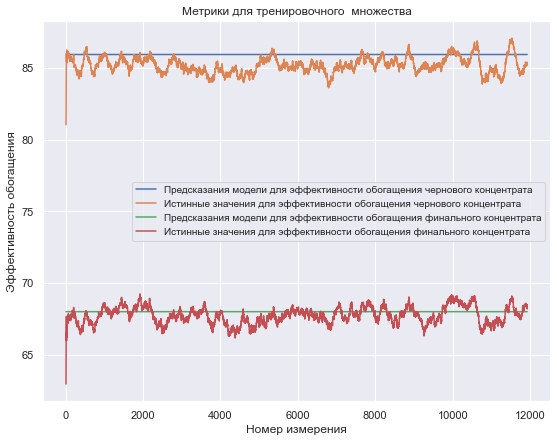

In [144]:
grph(200, 10)

### Обучение и оценка модели "Решающее дерево"

Создадим и обучим модель на основе решающего дерева

In [145]:
model = DecisionTreeRegressor(random_state=12345)
from sklearn.metrics import make_scorer
sMAPE_scoring = make_scorer(sMAPE_result, greater_is_better = False)
param_grid = {"max_depth": range(1, 6)}
DTR = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = sMAPE_scoring)

DTR.fit(features_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=12345,
                                             splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 6)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(sMAPE_result, greater_is_better=False),
             verbose=0)

Посмотрим на лучшие параметры

In [146]:
DTR.best_params_

{'max_depth': 5}

Сделаем предсказания и оценим качество модели, работающей с лучшими параметрами

In [147]:
DTR_2  = DTR.best_estimator_
predicted = DTR_2.predict(features_train)
predicted_test = DTR_2.predict(features_test)
sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": ["DTR"],
                                                          "sMAPE_result": [sMAPE_result(target_train, predicted)],
                                                          }))

sMAPE_result_metrics

,Модель,sMAPE_result
0,DummyReg,8.379798
0,DTR,6.006174


Посмторим как работа модели выглядит графически на трейне

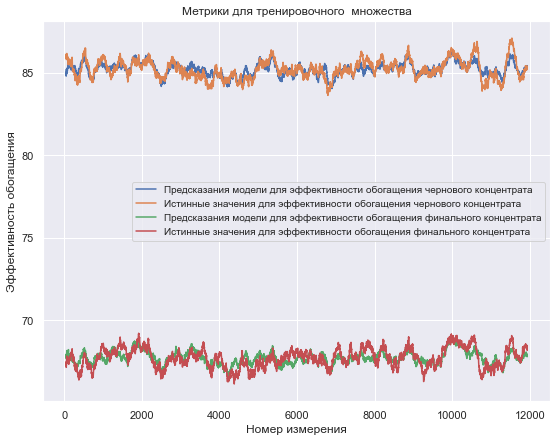

In [148]:
grph(200, 50)

### Обучение и оценка модели "Лассо", и ее проверка на тесте

Создадим и обучим модель на основе лассо

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLassoCV
model = MultiTaskLassoCV(random_state=12345)
from sklearn.metrics import make_scorer
sMAPE_scoring = make_scorer(sMAPE_result, greater_is_better = False)
param_grid = {"n_alphas": range(6, 9)}
MTL = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = sMAPE_scoring)
MTL.fit(features_train, target_train)

Посмотрим на лучшие параметры

In [ ]:
MTL.best_params_

Сделаем предсказания и оценим качество модели, работающей с лучшими параметрами

In [ ]:
MTL_2  = MTL.best_estimator_
predicted = MTL_2.predict(features_train)
predicted_test = MTL_2.predict(features_test)
sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": ["MTL"],
                                                          "sMAPE_result": [sMAPE_result(target_train, predicted)],
                                                          }))

sMAPE_result_metrics

Посмторим как работа модели выглядит графически на трейне

In [ ]:
grph(100, 10)

### Обучение и оценка модели "Случайный лес"

Создадим и обучим модель на основе случайного леса

In [ ]:
model = RandomForestRegressor(random_state=12345)
from sklearn.metrics import make_scorer
sMAPE_scoring = make_scorer(sMAPE_result, greater_is_better = False)
param_grid = {"n_estimators": range(15, 16, 1), "max_depth": range(5, 6)}
RFR = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = sMAPE_scoring)

RFR.fit(features_train, target_train)

Посмотрим на лучшие параметры

In [ ]:
RFR.best_params_

Сделаем предсказания и оценим качество модели, работающей с лучшими параметрами

In [ ]:
RFR_2  = RFR.best_estimator_
predicted = RFR_2.predict(features_train)
predicted_test = RFR_2.predict(features_test)
sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": ["RFR"],
                                                          "sMAPE_result": [sMAPE_result(target_train, predicted)],
                                                          }))

sMAPE_result_metrics

Посмторим как работа модели выглядит графически на трейне

In [ ]:
grph(200, 10)

### Обучение и оценка модели "Метод ближайщих соседей"

Создадим и обучим модель на основе метода ближайщих соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
from sklearn.metrics import make_scorer
sMAPE_scoring = make_scorer(sMAPE_result, greater_is_better = False)
param_grid = {"n_neighbors": range(5, 11, 5),"weights": ["uniform", "distance"], "algorithm": ["ball_tree", "kd_tree"]}
KNR = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = sMAPE_scoring)

KNR.fit(features_train, target_train)

Посмотрим на лучшие параметры

In [ ]:
KNR.best_params_

Сделаем предсказания и оценим качество модели, работающей с лучшими параметрами

In [ ]:
KNR_2  = KNR.best_estimator_
predicted = KNR_2.predict(features_train)
predicted_test = KNR_2.predict(features_test)
sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": ["KNR"],
                                                          "sMAPE_result": [sMAPE_result(target_train, predicted)]}))

sMAPE_result_metrics

Посмторим как работа модели выглядит графически на трейне

In [ ]:
grph(100, 10)

### Обучение и оценка модели линейной регрессии

Создадим и обучим модель на основе линейной регрессии

In [ ]:
model = LinearRegression()
from sklearn.metrics import make_scorer
sMAPE_scoring = make_scorer(sMAPE_result, greater_is_better = False)
param_grid = {'fit_intercept' : [True, False]}
LR = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = sMAPE_scoring)

LR.fit(features_train, target_train)

Посмотрим на лучшие параметры

In [ ]:
LR.best_params_

In [ ]:
LR_2  = LR.best_estimator_
predicted = LR_2.predict(features_train)
predicted_test = LR_2.predict(features_test)
sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": ["LR"],
                                                          "sMAPE_result": [sMAPE_result(target_train, predicted)]}))

sMAPE_result_metrics

Посмторим как работа модели выглядит графически на трейне

In [ ]:
grph(100, 10)

Лучшей моделью оказался случайный лес. Проверим его значение на тестовой выборке

In [ ]:
RFR_2  = RFR.best_estimator_
predicted_test = RFR_2.predict(features_test)
sMAPE_result_metrics = sMAPE_result_metrics.append(pd.DataFrame({"Модель": ["RFR_test"],
                                                          "sMAPE_result": [sMAPE_result(target_test, predicted_test)],
                                                          }))
sMAPE_result_metrics

На тестовой выборке модель показала результат sMAPE_test = 8,27, что всего на 2,61% выше, чем на валидационной выборке

## Выводы: 
### 1) Мы имеем дело с несколько разными распределениями на тренировочной и тестовой выборках (дамми модель дает разные предсказания)
### 2) Лучшей моделью с наименьшими показателями переобучения является модель "Случайны лес". На тестовой выборке результат sMAPE оказался хуже всего на 2,61%
### 3) Ближайщие соседи и линейная регрессия показали сильное переобучение (поэтому их во внимание не берем)
### 4) Отличие метрики sMAPE_result на тренировочной и тестовой выборках обусловлено отличием распределения признаков в этих выборках
### 5) Рекомендация - в следующих проектах отдельно решать задачу определения переобучения еще на этапе обучения модели на тренировочном мноестве
